# Traitement de données TD4

Le code pour ce TD est à rendre sur Arche avant le **vendredi 10 novembre 2023** pour les non-alternant·e·s et avant le **vendredi 24 novembre 2023** pour les alternant·e·s. Il sera à rendre sous la forme d'un notebook (.ipynb). Si vous utilisez Google colab, télécharger le fichier .ipynb pour le déposer sur Arche.

Les critères d'évaluation incluent la qualité du traitement des données, l'utilisation judicieuse des functions de pandas (et d'autres librairies python si utiles) et la clarté des résultats de l'analyse (c.à.d est-ce que la préparation de vos données vous permet de justifier vos conclusions ?)

# Données

Le fichier à l'adresse https://mdaquin.github.io/d/tdd/colony.csv contient des données sur les colonies de d'abeilles aux états unis, et les pertes de colonies dans les différents états au cours des années 2025 à 2021. Il a été obtenu du [site du derpartement d'agriculture du gouvernement américain](https://usda.library.cornell.edu/concern/publications/rn301137d?locale=en) (USDA). Il contient les colonnes suivante

 - year :	l'année
 - months	: la période de l'année concernée
 - state : l'état des états unis (ou "Other States") concerné
 - colony_n : nombre de colonies
 - colony_max : nombre maximum de colonies dans la période
 - colony_lost : nombre de colonies perdues
 - colony_lost_pct : pourcentage des colonies perdues
 - colony_added : nombre de colonies ajoutées
 - colony_reno : nombre de colonies rénovées
 - colony_reno_pct :	pourcentage des colonies rénovées

Un autre fichier est aussi disponible à https://mdaquin.github.io/d/tdd/stressor.csv donnant l'exposition à des éléments pouvant conduire à la perte de colonies dans chaque état à chaque période. Ce jeu de données inclut :

 - year :	l'année
 - months	: la période de l'année concernée
 - state : l'état des états unis (ou "Other States") concerné
 - stressor	: le type de problème
 - stress_pct : le pourcentage de colonies ayant été affectées par le problème.

L'objectif du TD est de comprendre quels facteurs (géographiques, économiques, etc.) influent sur ces les colonies d'abeilles.

# Tâches

Votre objectif ici est donc d'analyser ces données en relation avec d'autres données que vous trouverez en ligne afin :
1. trouver quels sont les problèmes ayant le plus d'influence sur la perte de colonies d'abeilles.
2. d'expliquer les différences en nombre de colonies entre états.
3. expliquer les différences de pertes de colonies d'une année à l'autre, globalement et état par état.

Pour cela, il vous faudra trouver des données supplémentaires, en particulier sur les états. Vous pouvez par exemple en trouver sur le site du [recensement américain](https://www.census.gov/data.html) ou  sur le site du [service national de météorologie américain](https://www.weather.gov/phi/localclimate.html).

# Format du rendu

Le rendu est demandé sous la forme d'un notebook de façon à ce qu'il puisse jouer le role à la fois de code et de rapport pour votre analyse. Il est important donc d'ajouter des cellules de texte pour, au fur et à mesure du code et des tâches, expliquer votre démarche, vos résultats et vos conclusions.

N'hésitez pas aussi à ajouter des commentaires dans le code pour le rendre plus lisible.

In [1822]:
# commencez ici
import pandas as pd

perturbation_factor = pd.read_csv('https://mdaquin.github.io/d/tdd/stressor.csv')
perturbation_factor

,year,months,state,stressor,stress_pct
0,2015,January-March,Alabama,Varroa mites,10.0
1,2015,January-March,Alabama,Other pests/parasites,5.4
2,2015,January-March,Alabama,Disesases,NaN
3,2015,January-March,Alabama,Pesticides,2.2
4,2015,January-March,Alabama,Other,9.1
...,...,...,...,...,...
7327,2021,April-June,United States,Other pests/parasites,12.8
7328,2021,April-June,United States,Disesases,5.5
7329,2021,April-June,United States,Pesticides,12.3
7330,2021,April-June,United States,Other,11.3


Ici, je voudrais de savoir le type de donner pour chaque colonne

In [1823]:
perturbation_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7332 non-null   int64  
 1   months      7332 non-null   object 
 2   state       7332 non-null   object 
 3   stressor    7332 non-null   object 
 4   stress_pct  6489 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 286.5+ KB


Il me semble que la stress_pct ont des valeurs manques

<AxesSubplot:>

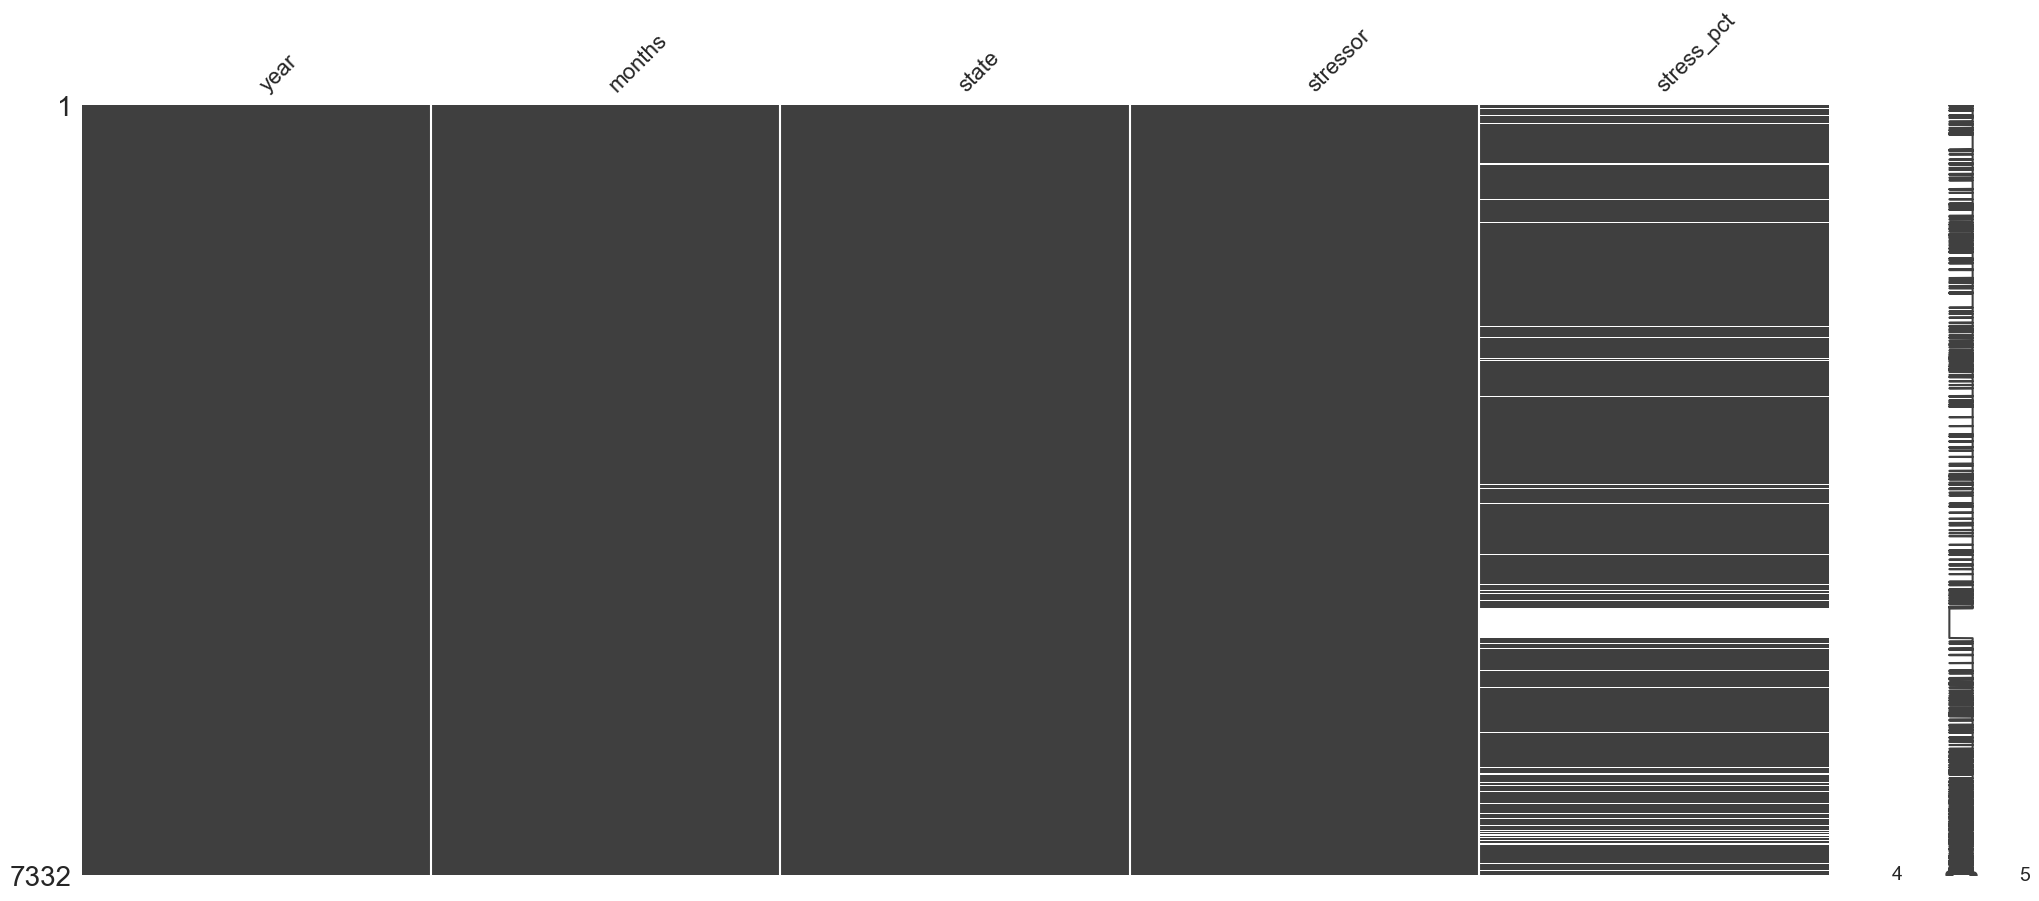

In [1824]:
import missingno as mno
mno.matrix(perturbation_factor)

Voici la list des valeurs manques, donc 11% des valeurs sont inconnues :

In [1825]:
rows_with_missing_values = perturbation_factor[perturbation_factor.stress_pct.isna()]
rows_with_missing_values

,year,months,state,stressor,stress_pct
2,2015,January-March,Alabama,Disesases,NaN
9,2015,January-March,Arizona,Pesticides,NaN
32,2015,January-March,Connecticut,Disesases,NaN
33,2015,January-March,Connecticut,Pesticides,NaN
51,2015,January-March,Hawaii,Pesticides,NaN
...,...,...,...,...,...
7301,2021,April-June,Washington,Unknown,NaN
7305,2021,April-June,West Virginia,Pesticides,NaN
7316,2021,April-June,Wyoming,Disesases,NaN
7321,2021,April-June,Other States,Other pests/parasites,NaN


In [1826]:
perturbation_factor.stress_pct.isna().sum()/len(perturbation_factor)

0.11497545008183306

Maintenance, je voudrais de savoir s'il y a des indices pour les récupérer, je vais essayer de savoir s'il est possible récupérer
Et si possible, dans quel sens et quelle sont les conséquences sur la résulta

Je prendre un exemple de l'etat de Arkansas:

In [1827]:
fl = perturbation_factor[(perturbation_factor['state'] == "Arkansas")]
fl

,year,months,state,stressor,stress_pct
12,2015,January-March,Arkansas,Varroa mites,17.6
13,2015,January-March,Arkansas,Other pests/parasites,11.4
14,2015,January-March,Arkansas,Disesases,1.5
15,2015,January-March,Arkansas,Pesticides,3.4
16,2015,January-March,Arkansas,Other,1.0
...,...,...,...,...,...
7063,2021,April-June,Arkansas,Other pests/parasites,23.0
7064,2021,April-June,Arkansas,Disesases,5.9
7065,2021,April-June,Arkansas,Pesticides,2.9
7066,2021,April-June,Arkansas,Other,2.1


J'ai choisi Varroa mites et Pesticides pour examiner :

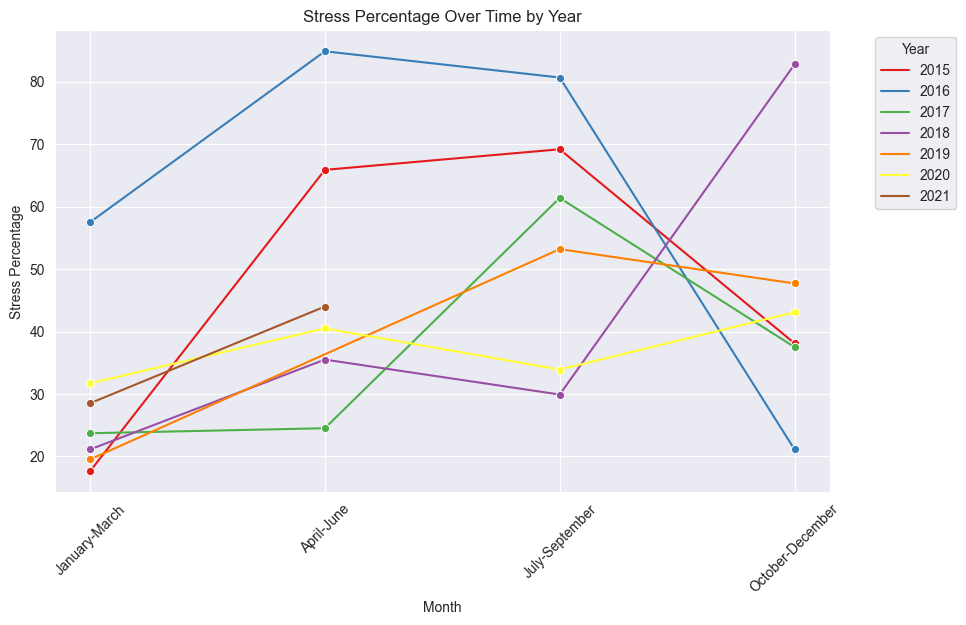

In [1828]:
import seaborn as sns
from matplotlib import pyplot as plt

fl_1 = fl[fl.stressor == "Varroa mites"]

# Create a line plot for the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=fl_1, x='months', y='stress_pct', hue='year', marker='o', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Stress Percentage')
plt.title('Stress Percentage Over Time by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

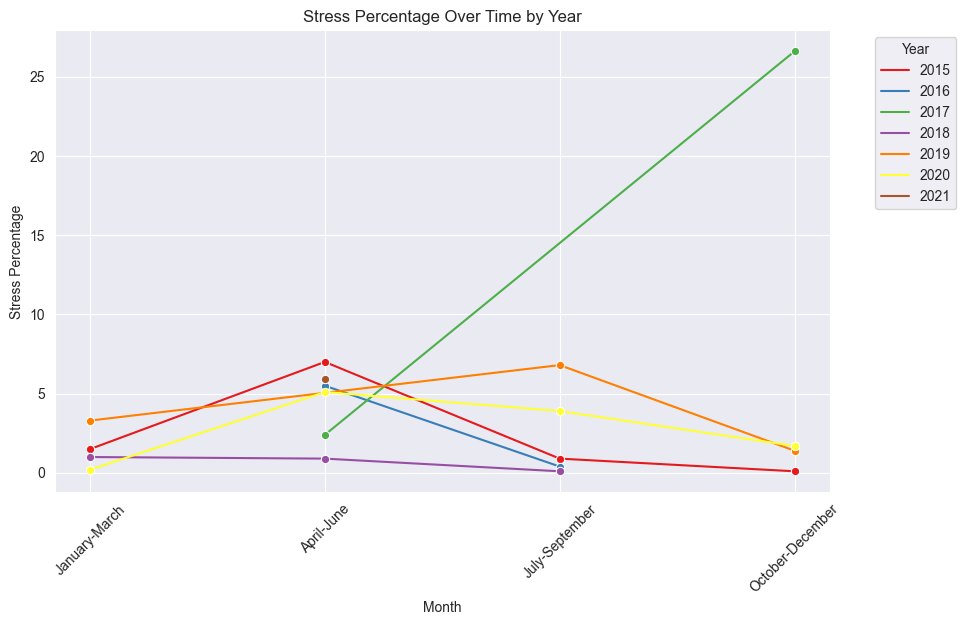

In [1829]:
fl_2 = fl[fl.stressor == "Disesases"]

# Create a line plot for the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=fl_2, x='months', y='stress_pct', hue='year', marker='o', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Stress Percentage')
plt.title('Stress Percentage Over Time by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Nous pouvons voir que les valuers present dans une manière aléatoire. Il n'y a pas un tendance entre les mois, entre l'année. Donc, essayer de récupére les données en utilisant la sense de chronologique n'est pas une bonne idée.

Maintenaint, je vais examiner la somme de pourcentage par ans (entre un facteur seulement) et par mois (entre les facteurs dans un period) :

In [1830]:
total = perturbation_factor[(perturbation_factor['year'] == 2015) & (perturbation_factor['state'] == "Arkansas") & (perturbation_factor['stressor'] == "Varroa mites")]['stress_pct'].sum()
total

190.79999999999998

In [1831]:
total = perturbation_factor[(perturbation_factor['year'] == 2015) & (perturbation_factor['state'] == "Arkansas") & (perturbation_factor['months'] == "April-June")]['stress_pct'].sum()
total

195.60000000000002

Les valeurs totals dans les deux cas dépasser 100%, donc les pourcentages est fait pas au niveau de chaque année. Pour un period, il est possible d'avoir multiples facteurs de perturbations.

Pour les valeurs manquantes, je décide de ne pas les re-constrituer à partir des données existants. Je vais regarder la deuxième jeu donnée

In [1832]:
abey_colonie = pd.read_csv('https://mdaquin.github.io/d/tdd/colony.csv')

In [1833]:
abey_colonie

,year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct
0,2015,January-March,Alabama,7000.0,7000.0,1800.0,26.0,2800.0,250.0,4.0
1,2015,January-March,Arizona,35000.0,35000.0,4600.0,13.0,3400.0,2100.0,6.0
2,2015,January-March,Arkansas,13000.0,14000.0,1500.0,11.0,1200.0,90.0,1.0
3,2015,January-March,California,1440000.0,1690000.0,255000.0,15.0,250000.0,124000.0,7.0
4,2015,January-March,Colorado,3500.0,12500.0,1500.0,12.0,200.0,140.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1217,2021,April-June,West Virginia,8000.0,9000.0,170.0,2.0,1900.0,390.0,4.0
1218,2021,April-June,Wisconsin,42000.0,57000.0,2200.0,4.0,9000.0,7500.0,13.0
1219,2021,April-June,Wyoming,13500.0,30000.0,3400.0,11.0,7500.0,4900.0,16.0
1220,2021,April-June,Other States,5970.0,8410.0,140.0,2.0,2890.0,3100.0,37.0


<AxesSubplot:>

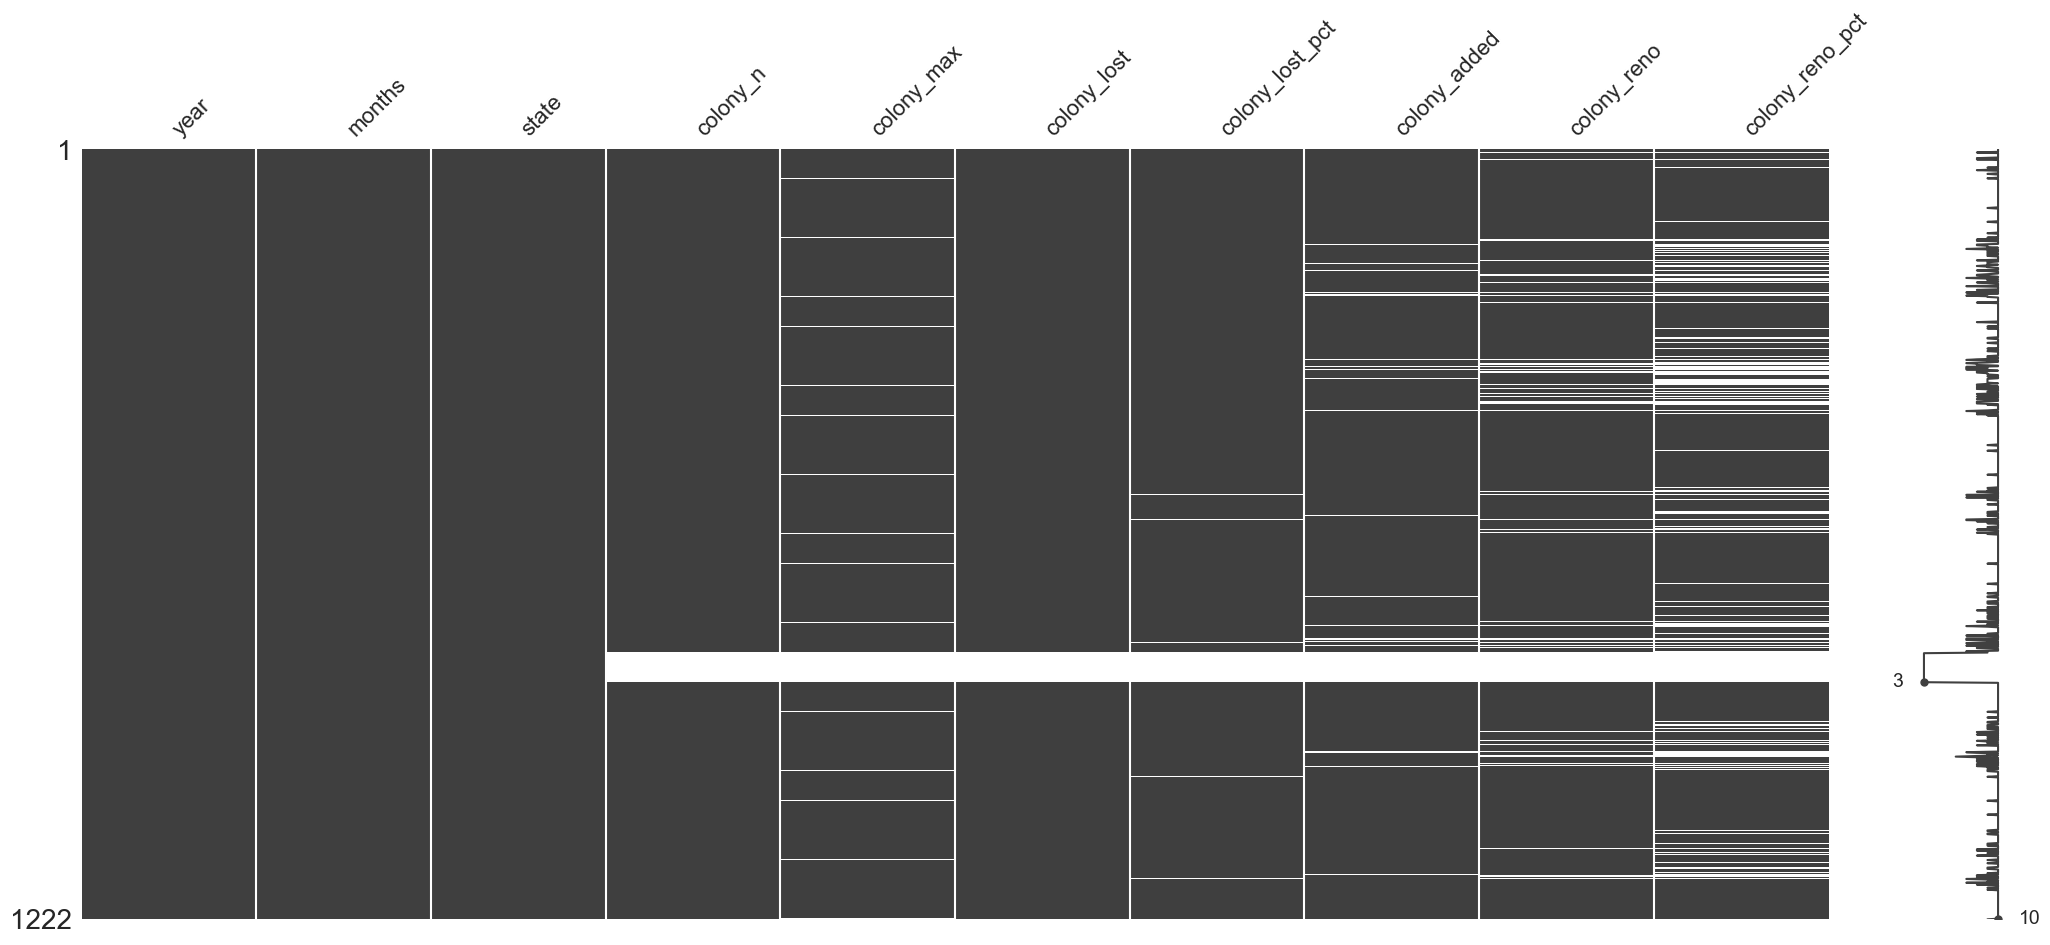

In [1834]:
import missingno as mno
mno.matrix(abey_colonie)

In [1835]:
rows_with_missing_values = abey_colonie[abey_colonie.colony_n.isna()]
rows_with_missing_values

,year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct
799,2019,April-June,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,2019,April-June,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,2019,April-June,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,2019,April-June,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,2019,April-June,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,2019,April-June,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,2019,April-June,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,2019,April-June,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,2019,April-June,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,2019,April-June,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1836]:
abey_colonie = abey_colonie[~((abey_colonie['year'] == 2019) & (abey_colonie['months'] == "April-June"))]

In [1837]:
abey_colonie['colony_max'].fillna(abey_colonie['colony_n'] + abey_colonie['colony_added'], inplace=True)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3768646865.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1838]:
abey_colonie['colony_added'].fillna(abey_colonie['colony_max'] - abey_colonie['colony_n'], inplace=True)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3178198067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1839]:
abey_colonie['colony_lost_pct'].fillna((abey_colonie['colony_lost']/abey_colonie['colony_max'])*100, inplace=True)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\2711651821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1840]:
abey_colonie['colony_reno'] = abey_colonie.apply(lambda row: (row['colony_reno_pct'] / 100) * row['colony_max'] if pd.isna(row['colony_reno']) and not pd.isna(row['colony_reno_pct']) else row['colony_reno'], axis=1)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\361327026.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1841]:
abey_colonie['colony_reno_pct'] = abey_colonie.apply(lambda row: (row['colony_reno'] / row['colony_max']) * 100 if pd.isna(row['colony_reno_pct']) and not pd.isna(row['colony_reno']) else row['colony_reno_pct'], axis=1)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\1263855726.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

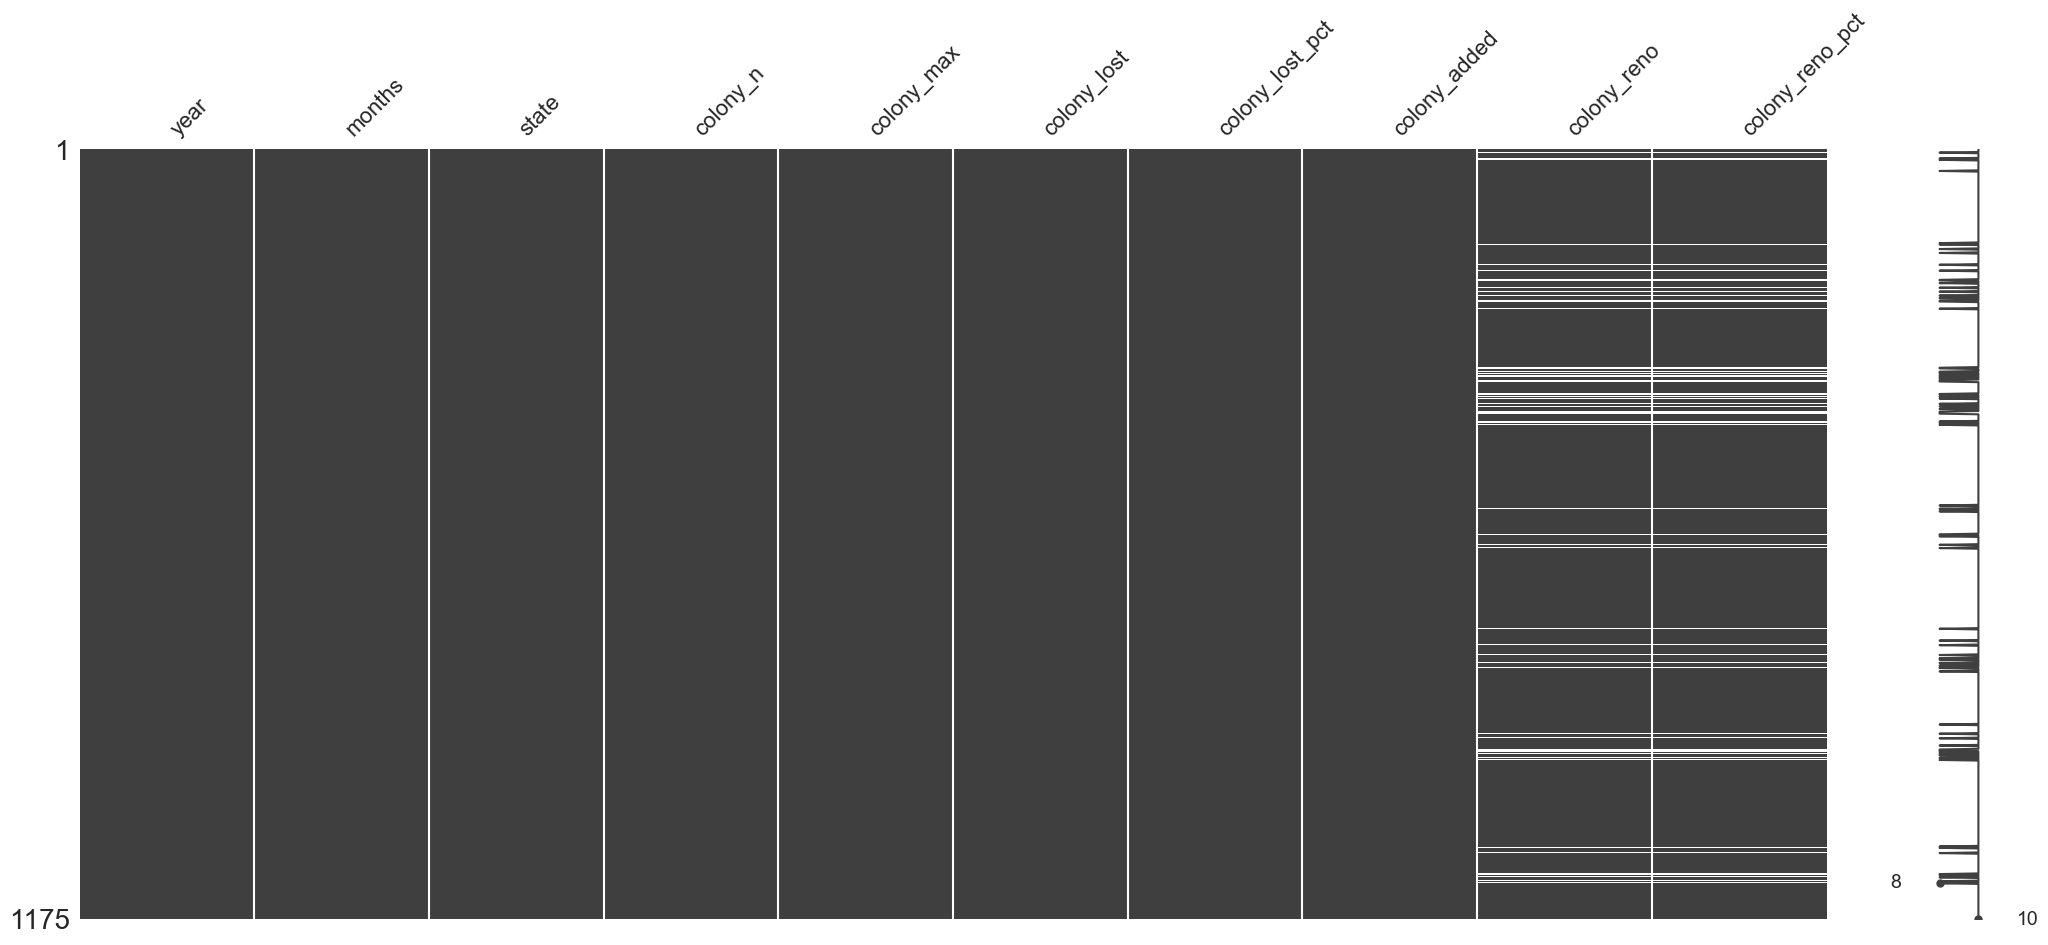

In [1842]:
mno.matrix(abey_colonie)

In [1843]:
rows_with_missing_values = abey_colonie[(abey_colonie.colony_reno.isna())]
rows_with_missing_values

,year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct
5,2015,January-March,Connecticut,3900.0,3900.0,870.0,22.000000,290.0,NaN,NaN
14,2015,January-March,Kentucky,7500.0,10500.0,4100.0,39.000000,250.0,NaN,NaN
16,2015,January-March,Maine,3100.0,6500.0,380.0,6.000000,20.0,NaN,NaN
33,2015,January-March,Pennsylvania,14000.0,21000.0,6500.0,31.000000,360.0,NaN,NaN
143,2015,October-December,Arkansas,23000.0,27000.0,2400.0,9.000000,1900.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1152,2021,January-March,Nebraska,11000.0,17500.0,640.0,4.000000,1300.0,NaN,NaN
1154,2021,January-March,New Mexico,3500.0,3500.0,230.0,7.000000,2200.0,NaN,NaN
1157,2021,January-March,North Dakota,51000.0,65000.0,180.0,0.276923,2700.0,NaN,NaN
1163,2021,January-March,South Dakota,28000.0,34000.0,450.0,1.000000,6000.0,NaN,NaN


In [1844]:
# abey_colonie['colony_reno'].fillna(0, inplace=True)

In [1845]:
perturbation_factor = perturbation_factor[~((perturbation_factor['year'] == 2019) & (perturbation_factor['months'] == "April-June"))]

In [1846]:
perturbation_factor['stress_pct'].fillna(0,inplace=True)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\886042326.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1847]:
# Pivot the DataFrame to create separate columns for each stressor
perturbation_factor = perturbation_factor.pivot(index=['year', 'months', 'state'], columns='stressor')['stress_pct'].reset_index()

# Reset the column names
perturbation_factor.columns.name = None

In [1848]:
# Calculate the mean colony loss for each factor
mean_varroa_mites_loss = perturbation_factor['Varroa mites'].mean()
mean_other_pests_loss = perturbation_factor['Other pests/parasites'].mean()
mean_diseases_loss = perturbation_factor['Disesases'].mean()
mean_pesticides_loss = perturbation_factor['Pesticides'].mean()
mean_other_loss = perturbation_factor['Other'].mean()
mean_unknown_loss = perturbation_factor['Unknown'].mean()

# Create a DataFrame to store mean colony loss for each factor
mean_loss = pd.DataFrame()

# Calculate the mean colony loss for each problem or stressor factor
mean_loss['Factor'] = ['Varroa mites', 'Other pests/parasites', 'Diseases', 'Pesticides', 'Other', 'Unknown']
mean_loss['Mean Colony Loss'] = [mean_varroa_mites_loss, mean_other_pests_loss, mean_diseases_loss, mean_pesticides_loss, mean_other_loss, mean_unknown_loss]

# Print the mean colony loss for each factor
print("Mean Colony Loss for Varroa Mites:", mean_varroa_mites_loss)
print("Mean Colony Loss for Other Pests/Parasites:", mean_other_pests_loss)
print("Mean Colony Loss for Diseases:", mean_diseases_loss)
print("Mean Colony Loss for Pesticides:", mean_pesticides_loss)
print("Mean Colony Loss for Other:", mean_other_loss)
print("Mean Colony Loss for Unknown:", mean_unknown_loss)

Mean Colony Loss for Varroa Mites: 30.419829787234043
Mean Colony Loss for Other Pests/Parasites: 11.060851063829787
Mean Colony Loss for Diseases: 3.573872340425532
Mean Colony Loss for Pesticides: 6.473191489361702
Mean Colony Loss for Other: 6.193787234042554
Mean Colony Loss for Unknown: 4.153191489361702


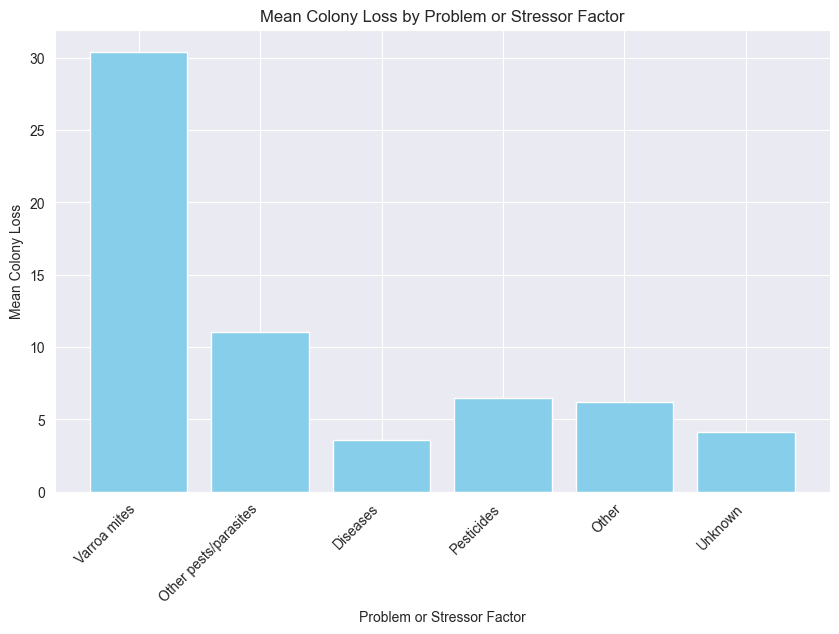

In [1849]:
# Create a bar plot to visualize the mean colony loss for each factor
plt.figure(figsize=(10, 6))
plt.bar(mean_loss['Factor'], mean_loss['Mean Colony Loss'], color='skyblue')
plt.xlabel('Problem or Stressor Factor')
plt.ylabel('Mean Colony Loss')
plt.title('Mean Colony Loss by Problem or Stressor Factor')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

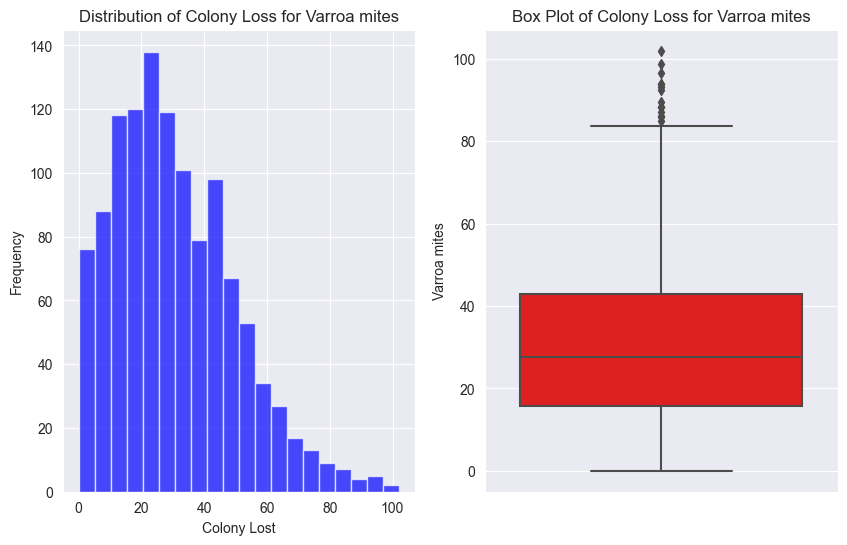

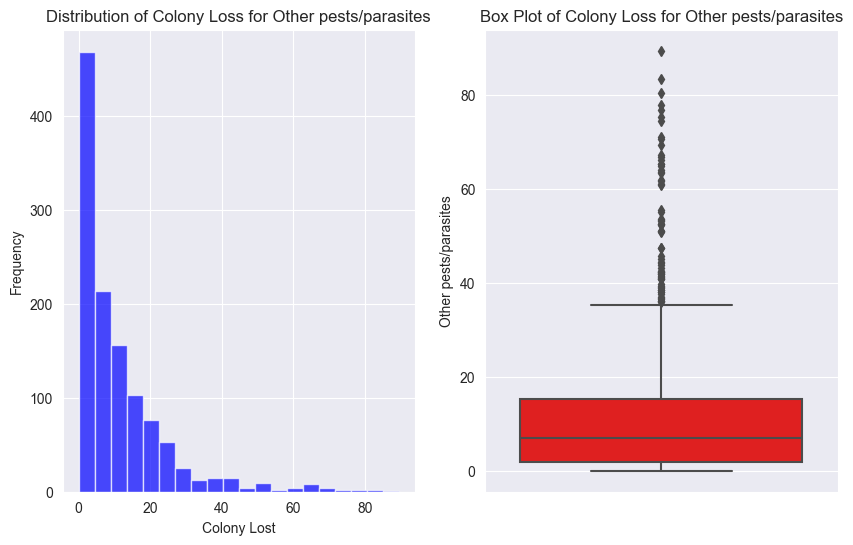

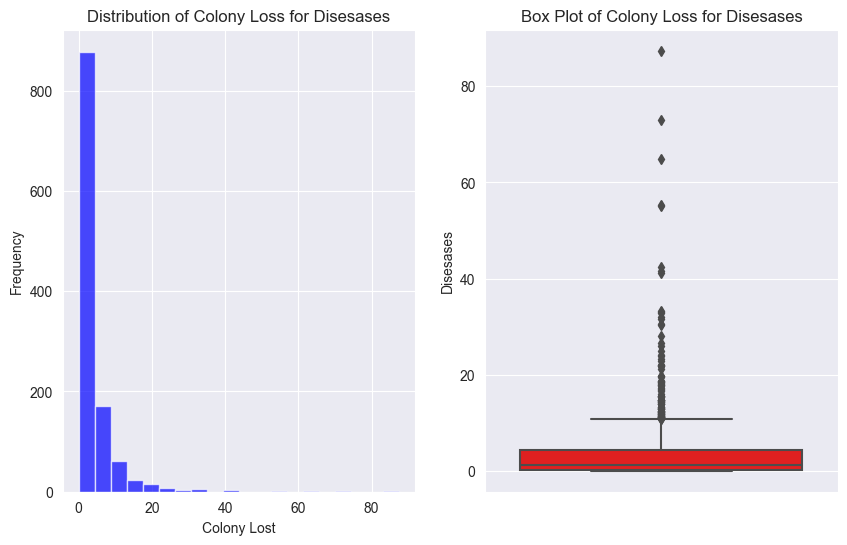

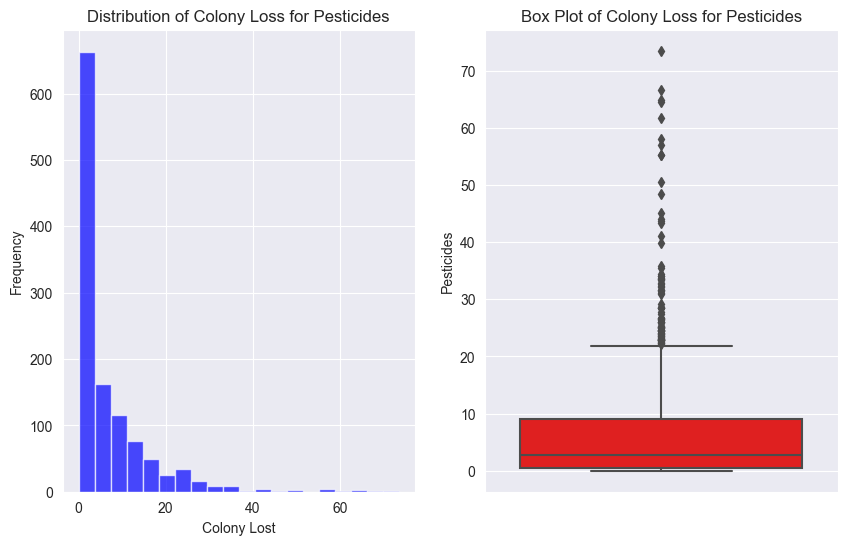

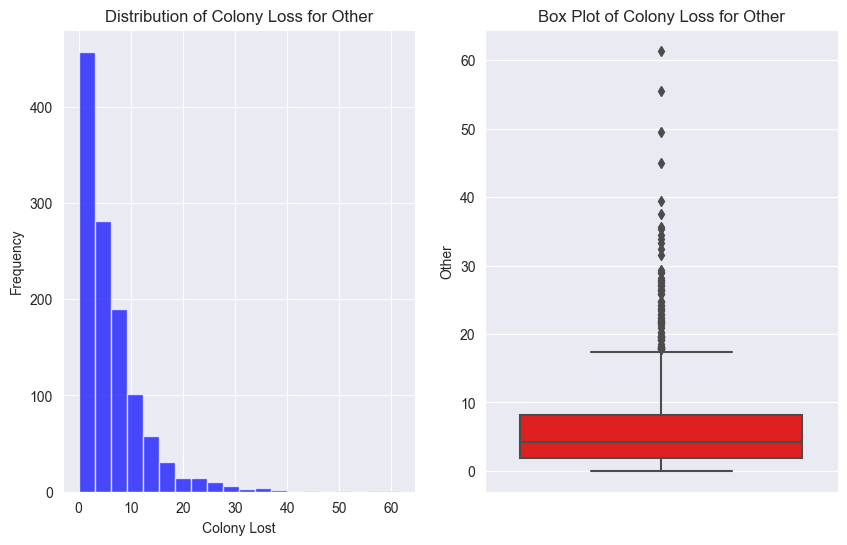

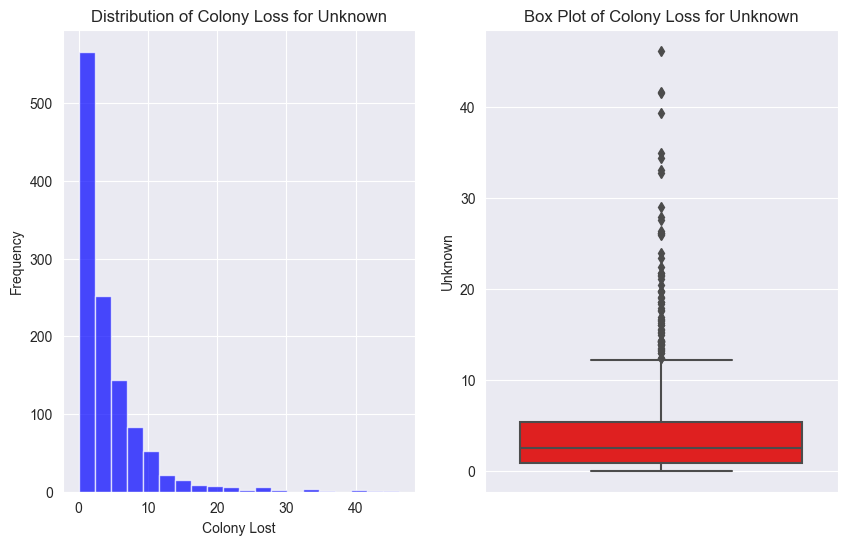

In [1850]:
# Create data distributions and box plots for each factor
factors = ['Varroa mites', 'Other pests/parasites', 'Disesases', 'Pesticides', 'Other', 'Unknown']

for factor in factors:
    plt.figure(figsize=(10, 6))
    subset = factor

    # Data Distribution (Histogram)
    plt.subplot(1, 2, 1)
    plt.hist(perturbation_factor[subset], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Colony Lost')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Colony Loss for {factor}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=perturbation_factor[subset], color='red')
    plt.title(f'Box Plot of Colony Loss for {factor}')

    plt.show()

    plt.show()

In [1851]:
# Group by 'state,' 'year,'
abey_colonie_filter_by_year = abey_colonie.groupby(['state', 'year']).agg({
    'colony_n': 'mean',
    'colony_max': 'max',  # Take the maximum value of a year
    'colony_lost': 'sum',
    'colony_lost_pct': 'mean',
    'colony_added': 'sum'
}).reset_index()
abey_colonie_filter_by_year_no_us = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] != 'United States']

# Create an empty DataFrame to store the results
top10_lost_by_year = pd.DataFrame()
top10_max_by_year = pd.DataFrame()

for year in abey_colonie_filter_by_year['year'].unique():
    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5 = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year].sort_values(by='colony_lost_pct', ascending=False).head(10)

    # Create a new column with the year as the column name and populate it with state values
    top10_lost_by_year[str(year)] = top5['state'].tolist()

    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5 = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year].sort_values(by='colony_max', ascending=False).head(11)

    # Create a new column with the year as the column name and populate it with state values
    top10_max_by_year[str(year)] = top5['state'].tolist()

top10_max_by_year = top10_max_by_year.drop(0)
top10_lost_by_year

,2015,2016,2017,2018,2019,2020,2021
0,Kansas,Kansas,New Mexico,New Mexico,Kansas,Alabama,Missouri
1,Ohio,New Mexico,Arkansas,Arizona,Tennessee,Arizona,Alabama
2,Kentucky,Arizona,Massachusetts,Indiana,Colorado,Kansas,Arizona
3,Arizona,Oklahoma,Kansas,Kentucky,Maryland,Colorado,Pennsylvania
4,Illinois,Alabama,Arizona,Tennessee,Massachusetts,Virginia,Kansas
5,Arkansas,United States,Florida,Arkansas,Wisconsin,Ohio,Illinois
6,Wisconsin,New York,Tennessee,Kansas,Ohio,Michigan,Georgia
7,Alabama,Minnesota,Indiana,Massachusetts,West Virginia,Idaho,Oklahoma
8,Maryland,Ohio,Pennsylvania,Virginia,Iowa,Illinois,Ohio
9,Georgia,Florida,Illinois,Illinois,Illinois,Missouri,Indiana


C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



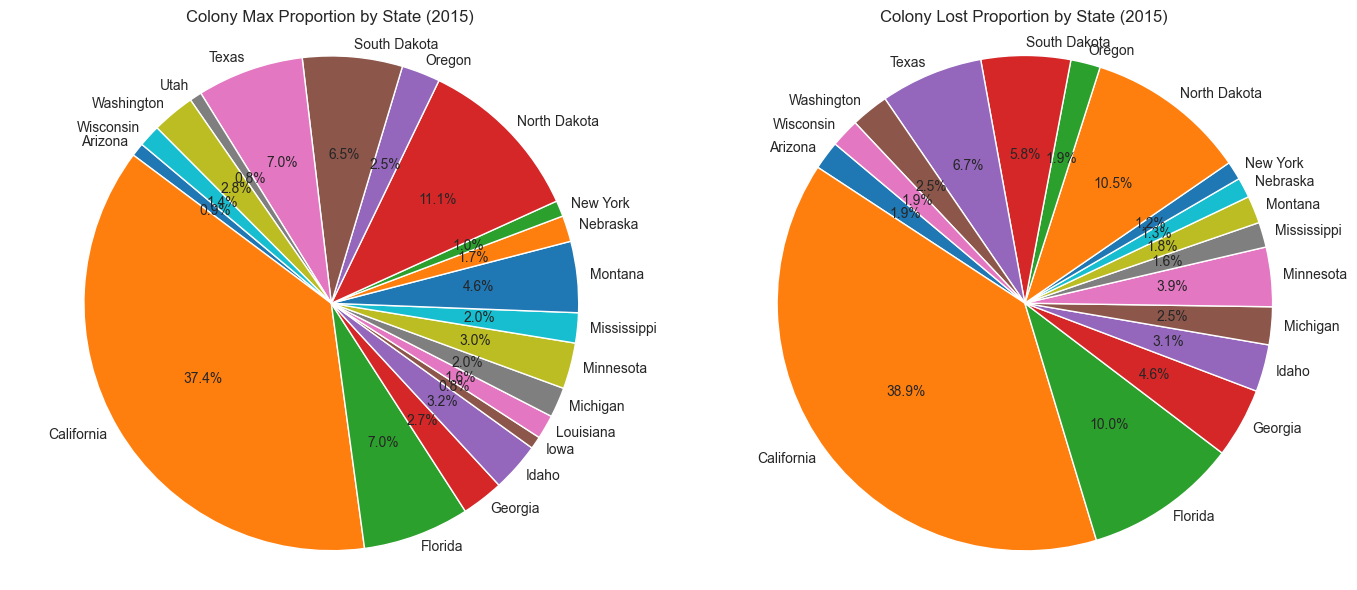

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



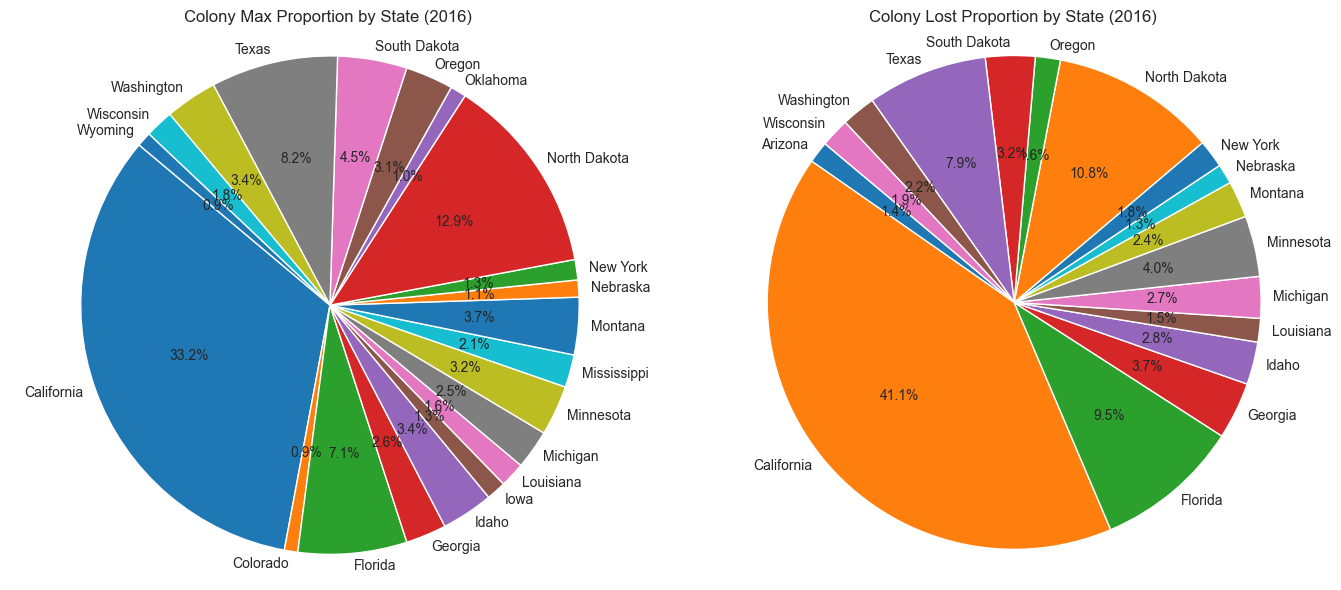

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



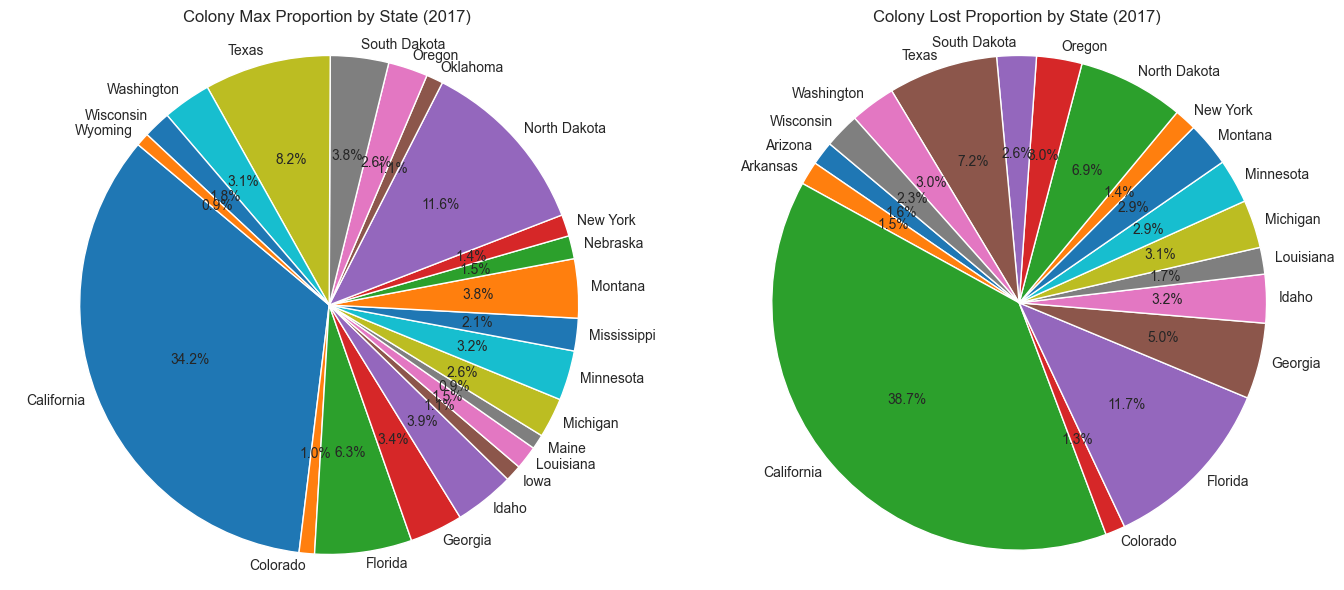

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



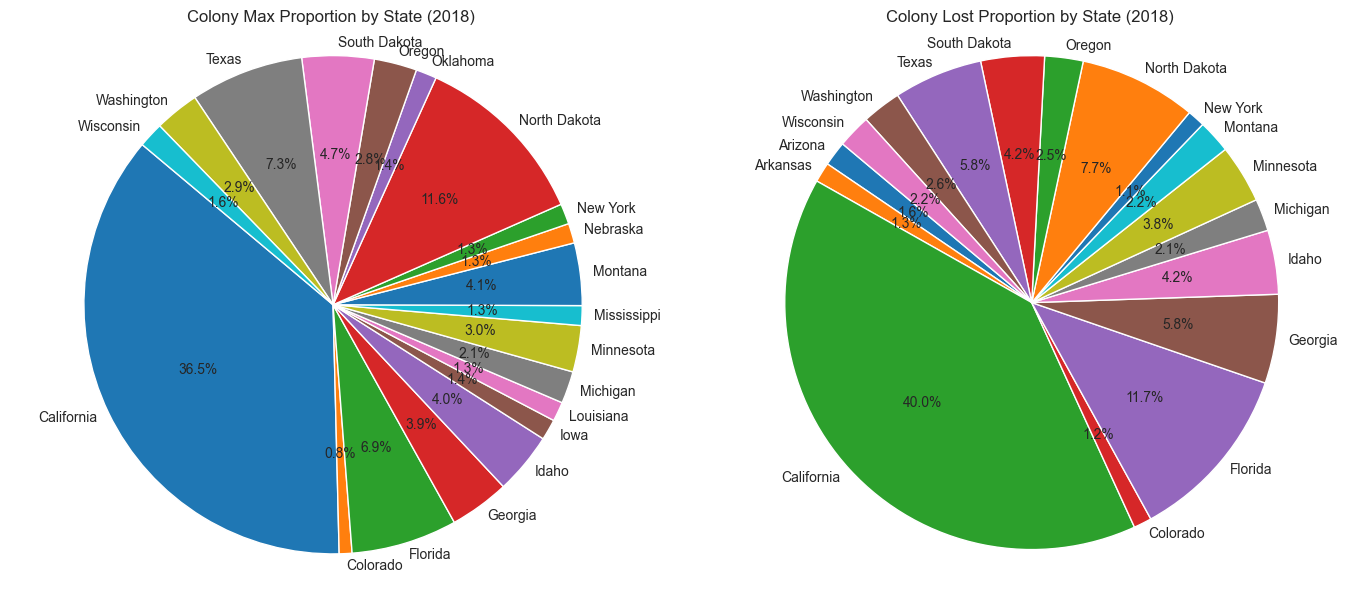

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



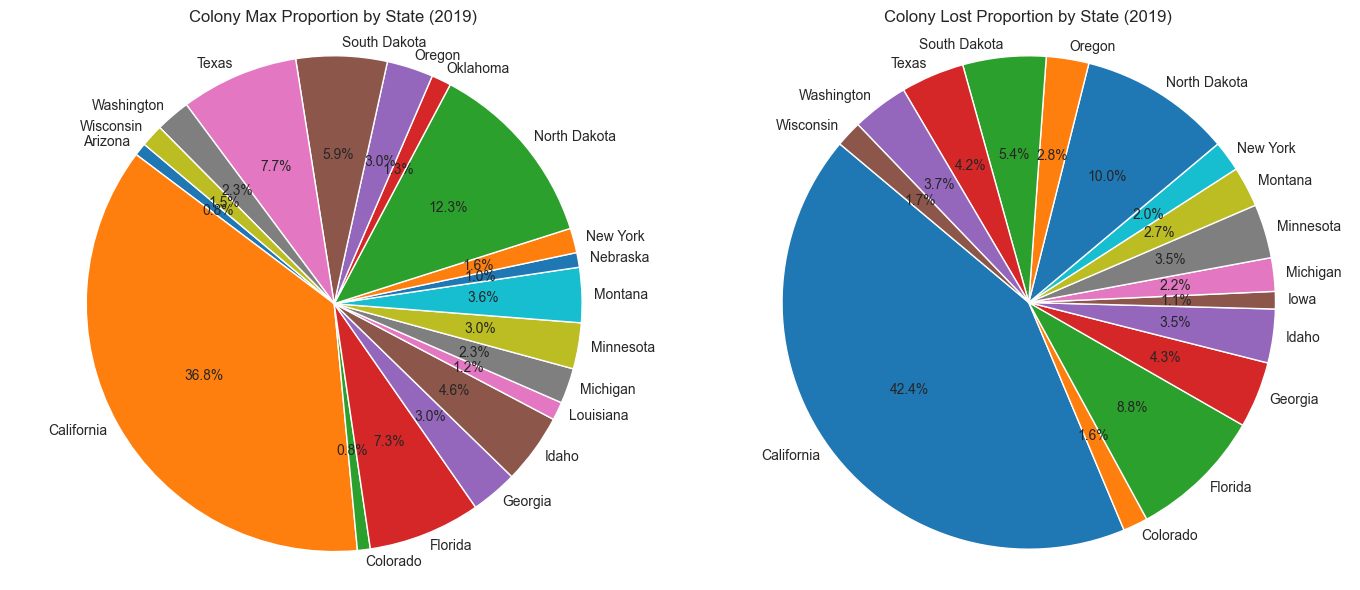

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



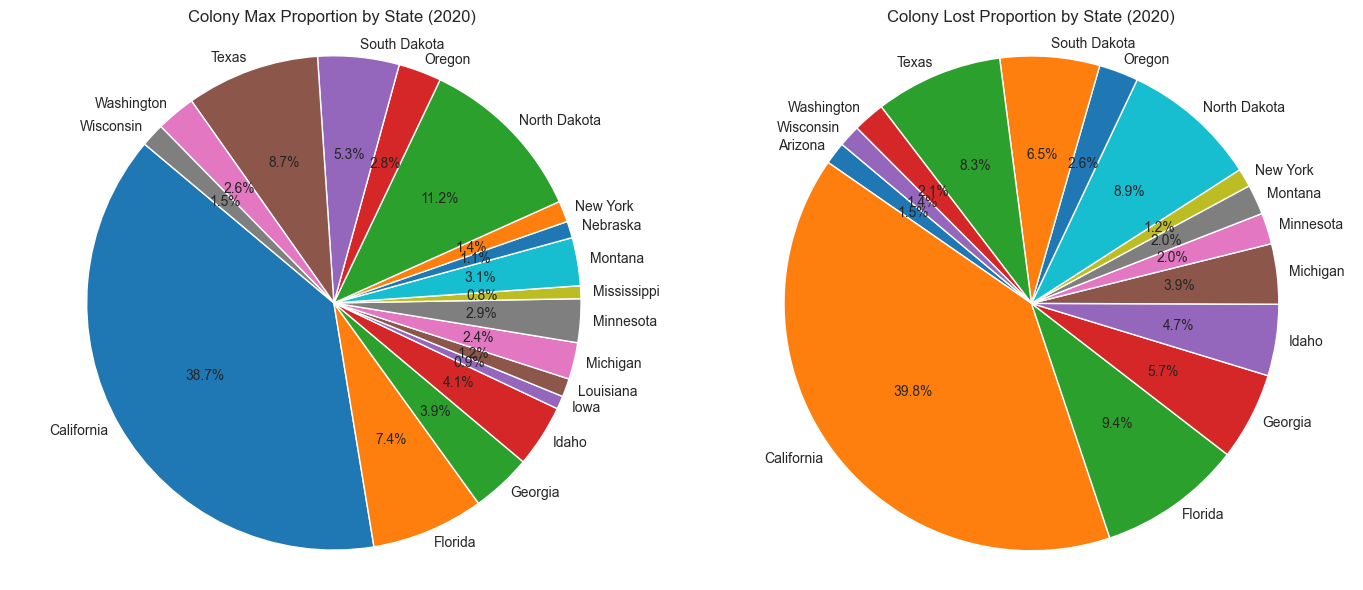

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_16908\3073855422.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



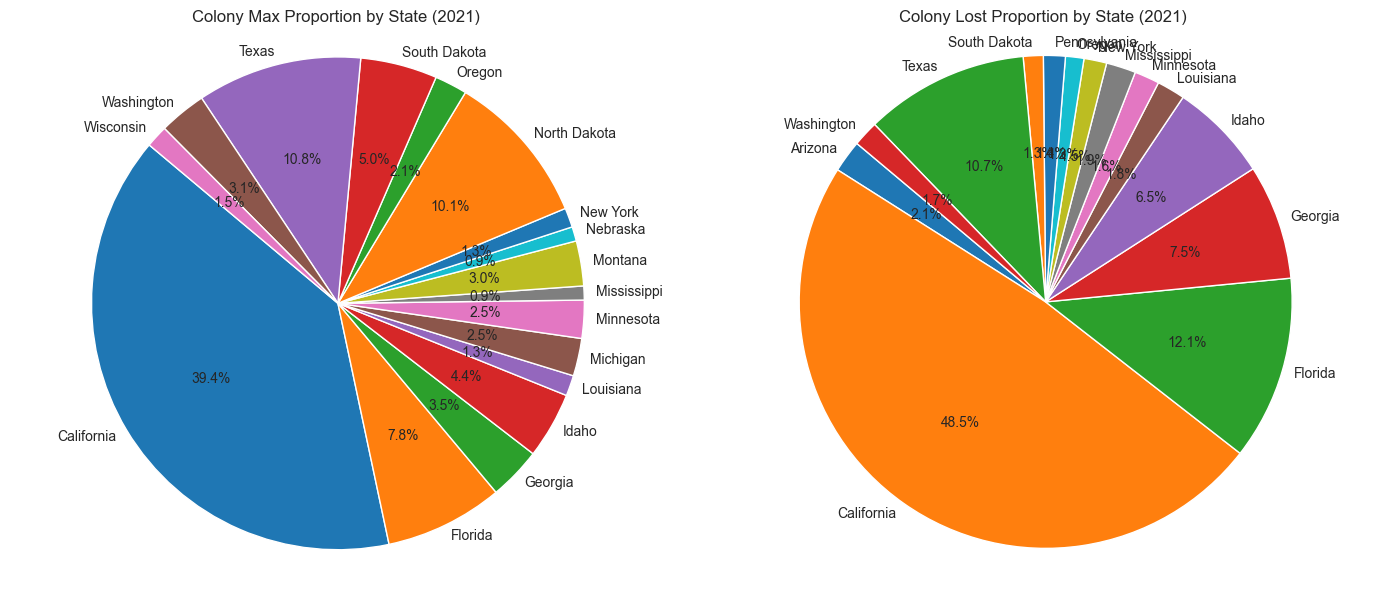

In [1852]:
for year in abey_colonie_filter_by_year['year'].unique():
    # Calculate the national total for the specific year
    national_total_max = abey_colonie_filter_by_year[(abey_colonie_filter_by_year['year'] == year) & (abey_colonie_filter_by_year['state'] == 'United States')]['colony_max'].values[0]
    national_total_lost = abey_colonie_filter_by_year[(abey_colonie_filter_by_year['year'] == year) & (abey_colonie_filter_by_year['state'] == 'United States')]['colony_lost'].values[0]

    # Filter the DataFrame for the specific year
    year_mask = abey_colonie_filter_by_year['year'] == year

    # Filter out 'United States' from the DataFrame for the pie chart
    data_max = abey_colonie_filter_by_year.loc[year_mask & (abey_colonie_filter_by_year['state'] != 'United States')]
    data_lost = abey_colonie_filter_by_year.loc[year_mask & (abey_colonie_filter_by_year['state'] != 'United States')]

    # Calculate the proportions of colony_max and colony_lost for each state compared to the national totals
    data_max['proportion'] = data_max['colony_max'] / national_total_max
    data_lost['proportion'] = data_lost['colony_lost'] / national_total_lost

    # Filter out slices with small proportions (e.g., less than 1%)
    min_proportion = 0.01
    data_max = data_max[data_max['proportion'] >= min_proportion]
    data_lost = data_lost[data_lost['proportion'] >= min_proportion]

    # Create subplots with two pie charts side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Create the first pie chart for colony_max
    ax1 = axes[0]
    labels_max = data_max['state']
    proportions_max = data_max['proportion']
    ax1.pie(proportions_max, labels=labels_max, autopct='%1.1f%%', startangle=140, labeldistance=1.05)
    ax1.set_title(f'Colony Max Proportion by State ({year})')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Create the second pie chart for colony_lost
    ax2 = axes[1]
    labels_lost = data_lost['state']
    proportions_lost = data_lost['proportion']
    ax2.pie(proportions_lost, labels=labels_lost, autopct='%1.1f%%', startangle=140, labeldistance=1.05)
    ax2.set_title(f'Colony Lost Proportion by State ({year})')
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie charts
    plt.tight_layout()
    plt.show()


In [1853]:
# Group by 'state,' 'year,'
abey_colonie_filter_by_month = abey_colonie.groupby(['state', 'months']).agg({
    'colony_max': 'mean',  # Take the minimum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
    'colony_added': 'mean'
}).reset_index()

abey_colonie_filter_by_month_no_us = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] != 'United States']

# abey_colonie_filter_by_month['colony_lost_pct'] = (abey_colonie_filter_by_month['colony_lost']/abey_colonie_filter_by_month['colony_max'])*100

# Create an empty DataFrame to store the results
top10_by_month = pd.DataFrame()

for month in abey_colonie_filter_by_month['months'].unique():
    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5 = abey_colonie_filter_by_month_no_us[abey_colonie_filter_by_month_no_us['months'] == month].sort_values(by='colony_lost_pct', ascending=False).head(5)

    # Create a new column with the year as the column name and populate it with state values
    top10_by_month[str(month)] = top5['state'].tolist()

# top5_by_month = top5_by_month.drop(top5_by_month.index[0]).reset_index(drop=True)
top10_by_month = top10_by_month[['January-March', 'April-June', 'July-September', 'October-December']]
top10_by_month

,January-March,April-June,July-September,October-December
0,Ohio,Alabama,Kansas,Kansas
1,Illinois,Arizona,New Mexico,Arizona
2,Kansas,Florida,Arizona,Colorado
3,Maryland,Arkansas,Colorado,North Carolina
4,Kentucky,Illinois,Minnesota,New Mexico


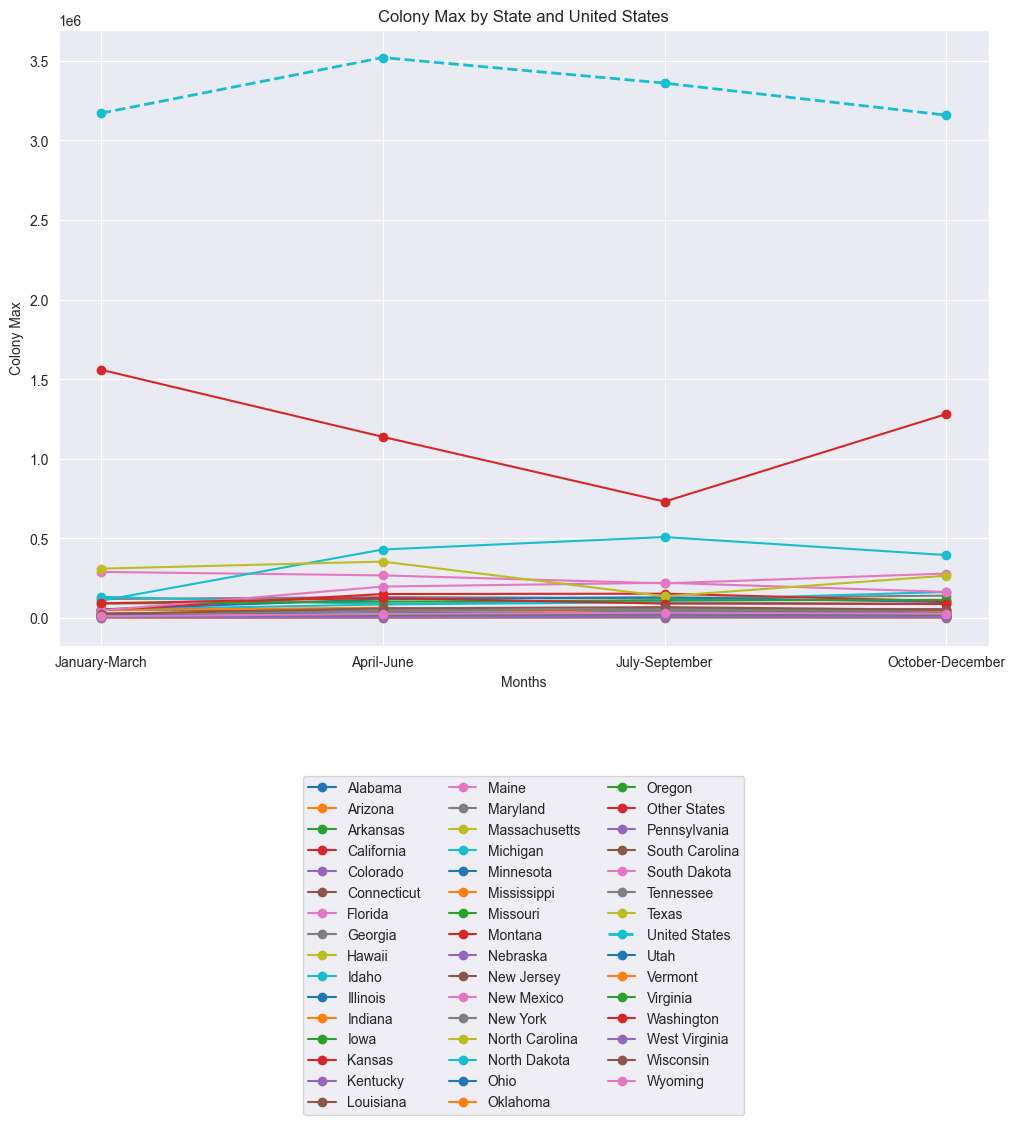

In [1854]:
import matplotlib.pyplot as plt

# Create a list of states including 'United States'
states = abey_colonie_filter_by_month['state'].unique()

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month['months'] = pd.Categorical(abey_colonie_filter_by_month['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month = abey_colonie_filter_by_month.sort_values(['months'])

# Filter out 'United States' data for the total line
us_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == 'United States']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for state in states:
    if state == 'United States':
        # Plot 'United States' as a separate line
        ax.plot(us_data['months'], us_data['colony_max'], label=state, linestyle='--', linewidth=2, marker='o', markersize=6)
    else:
        # Filter data for the current state
        state_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == state]
        ax.plot(state_data['months'], state_data['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by State and United States')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

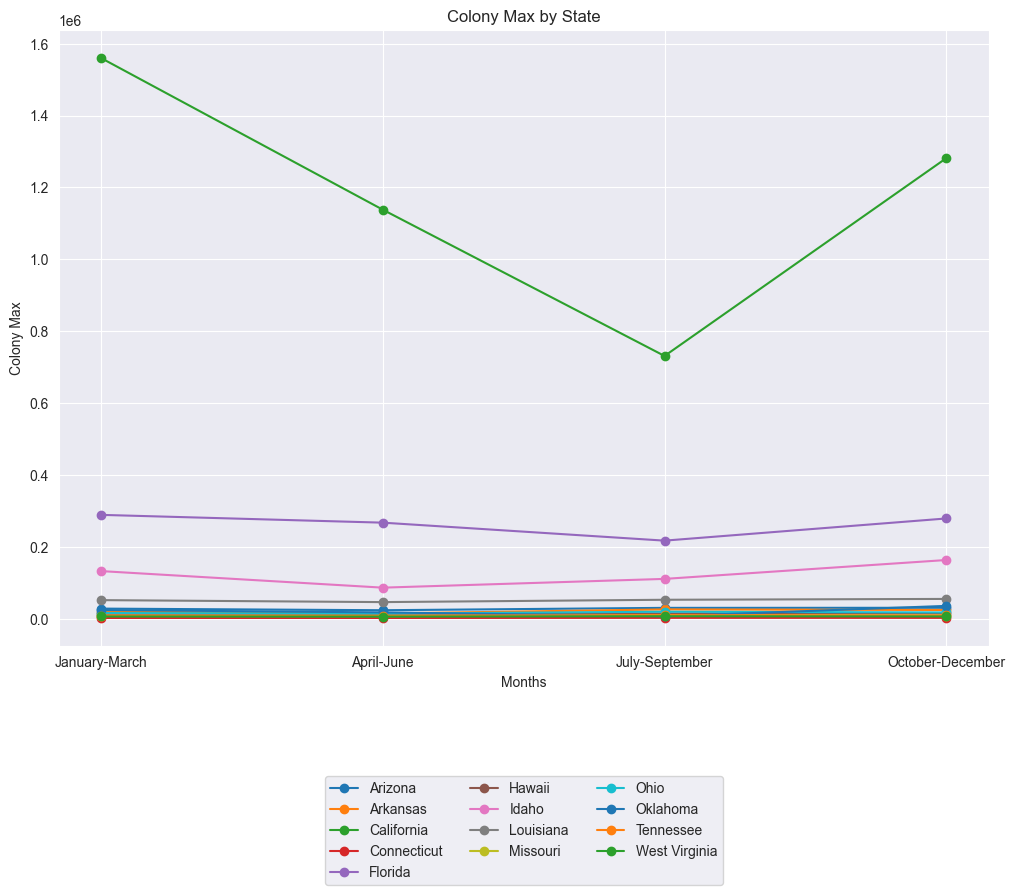

In [1855]:
import pandas as pd

# Pivot the DataFrame to create separate columns for each month's colony_max
pivoted_df = abey_colonie_filter_by_month.pivot(index='state', columns='months', values='colony_max').reset_index()

# Rename the columns for clarity
pivoted_df.columns = ['state', 'January-March', 'April-June', 'July-September', 'October-December']

# Calculate and add a new column for states where 'April-June' colony_max is smaller than 'January-March'
pivoted_df['April-June < January-March'] = (pivoted_df['April-June'] < pivoted_df['January-March'])

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month['months'] = pd.Categorical(abey_colonie_filter_by_month['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month = abey_colonie_filter_by_month.sort_values(['months'])

#Filtering states
pivoted_df = pivoted_df[pivoted_df['April-June < January-March'] == True]
states = pivoted_df['state'].unique()

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for state in states:
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == state]
    ax.plot(state_data['months'], state_data['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by State')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [1856]:
# Pivot the DataFrame to create separate columns for each month's colony_max
pivoted_df = abey_colonie.drop(['colony_n','colony_lost','colony_lost_pct','colony_added','colony_reno','colony_reno_pct'], axis=1)
pivoted_df = pivoted_df.pivot(index=['state', 'year'], columns='months', values='colony_max').reset_index()
pivoted_df[pivoted_df['year'] == 2019]

months,state,year,April-June,January-March,July-September,October-December
4,Alabama,2019,NaN,5500.0,7000.0,6000.0
11,Arizona,2019,NaN,22000.0,30000.0,36000.0
18,Arkansas,2019,NaN,28000.0,21000.0,19500.0
25,California,2019,NaN,1580000.0,700000.0,1300000.0
32,Colorado,2019,NaN,7500.0,36000.0,27000.0
39,Connecticut,2019,NaN,3100.0,4400.0,4000.0
46,Florida,2019,NaN,315000.0,240000.0,300000.0
53,Georgia,2019,NaN,129000.0,118000.0,131000.0
60,Hawaii,2019,NaN,16500.0,17000.0,17000.0
67,Idaho,2019,NaN,145000.0,111000.0,196000.0


<Figure size 640x480 with 0 Axes>

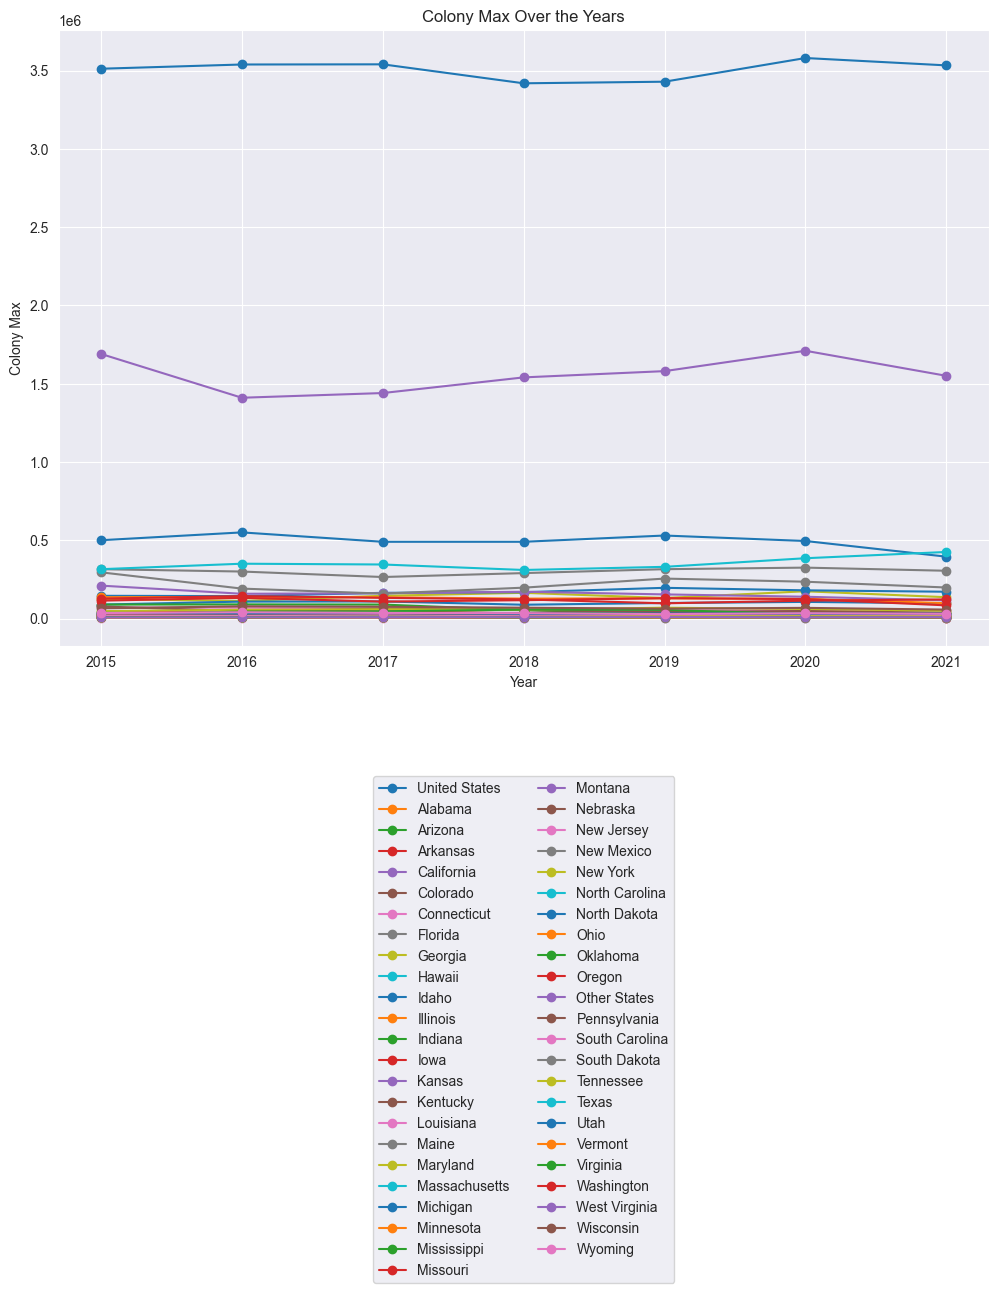

In [1857]:
import matplotlib.pyplot as plt

# Filter out the 'United States' data
us_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] == 'United States']

# Group other states by year
state_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] != 'United States']

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the 'United States' data
ax.plot(us_data['year'], us_data['colony_max'], label='United States', marker='o', markersize=6)

# Loop through other states and plot them separately
for state in state_data.state.unique():
    state_subset = state_data[state_data['state'] == state]
    ax.plot(state_subset['year'], state_subset['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max Over the Years')

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.show()


In [1858]:
# Merge the two DataFrames based on 'state', 'year', and 'months'
perturbation_factor = perturbation_factor.merge(abey_colonie[['state', 'year', 'months', 'colony_lost','colony_max']], on=['state', 'year', 'months'])
perturbation_factor

,year,months,state,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites,colony_lost,colony_max
0,2015,April-June,Alabama,0.0,3.2,42.5,2.3,4.1,16.7,860.0,7500.0
1,2015,April-June,Arizona,0.5,28.2,32.1,20.1,0.3,8.4,5500.0,33000.0
2,2015,April-June,Arkansas,7.0,27.4,63.4,22.6,9.3,65.9,1900.0,13500.0
3,2015,April-June,California,7.8,14.2,21.5,23.0,3.1,50.9,104000.0,1050000.0
4,2015,April-June,Colorado,4.6,3.4,1.8,2.8,6.6,38.6,1900.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,2021,January-March,Virginia,0.0,3.9,1.0,1.9,4.9,11.9,1400.0,7000.0
1171,2021,January-March,Washington,1.0,5.3,2.4,0.0,0.0,15.5,6000.0,67000.0
1172,2021,January-March,West Virginia,0.7,1.2,3.4,2.6,3.3,13.7,1200.0,7500.0
1173,2021,January-March,Wisconsin,0.0,3.6,0.0,0.0,3.2,16.1,2500.0,37000.0


In [1859]:
new_column_names = {
    'year': 'year',
    'months': 'months',
    'state': 'state',
    'colony_lost': 'colony_lost',
    'Disesases': 'Disesases pct',
    'Other': 'Other pct',
    'Other pests/parasites': 'Other pests/parasites pct',
    'Pesticides': 'Pesticides pct',
    'Unknown': 'Unknown pct',
    'Varroa mites': 'Varroa mites pct'
}

perturbation_factor = perturbation_factor.rename(columns=new_column_names)
perturbation_factor['Disesases'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Disesases pct']
perturbation_factor['Other'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Other pct']
perturbation_factor['Other pests/parasites'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Other pests/parasites pct']
perturbation_factor['Pesticides'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Pesticides pct']
perturbation_factor['Unknown'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Unknown pct']
perturbation_factor['Varroa mites'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Varroa mites pct']


In [1860]:
# Group by 'state,' 'year,'
perturbation_factor_by_year = perturbation_factor.groupby(['state', 'year']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'sum',
    'Disesases':'sum',
    'Other':'sum',
    'Other pests/parasites':'sum',
    'Pesticides':'sum',
    'Unknown':'sum',
    'Varroa mites':'sum',
}).reset_index()

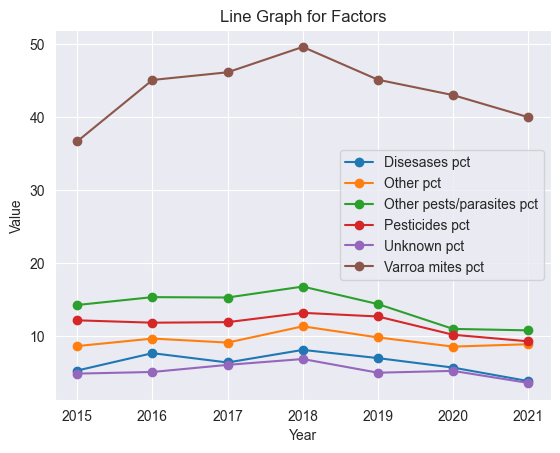

In [1861]:
perturbation_factor_by_year_us = perturbation_factor_by_year[perturbation_factor_by_year['state'] == 'United States']
factors = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

from itertools import cycle
# Choose a colormap (e.g., 'tab10' for a set of 10 distinct colors)
colormap = plt.cm.get_cmap('tab10')

# Create a line graph for each factor with automatic color assignment
color_cycle = cycle(colormap.colors)

#Create dataframe to store data
data = {}

# Add a 'year' column to the DataFrame
data['year'] = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for factor in factors:
    data[factor] = perturbation_factor_by_year_us[factor]
    color = next(color_cycle)
    plt.plot(data['year'], data[factor], label=factor, marker='o', linestyle='-', color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph for Factors')
plt.legend()

# Show the graph
plt.show()

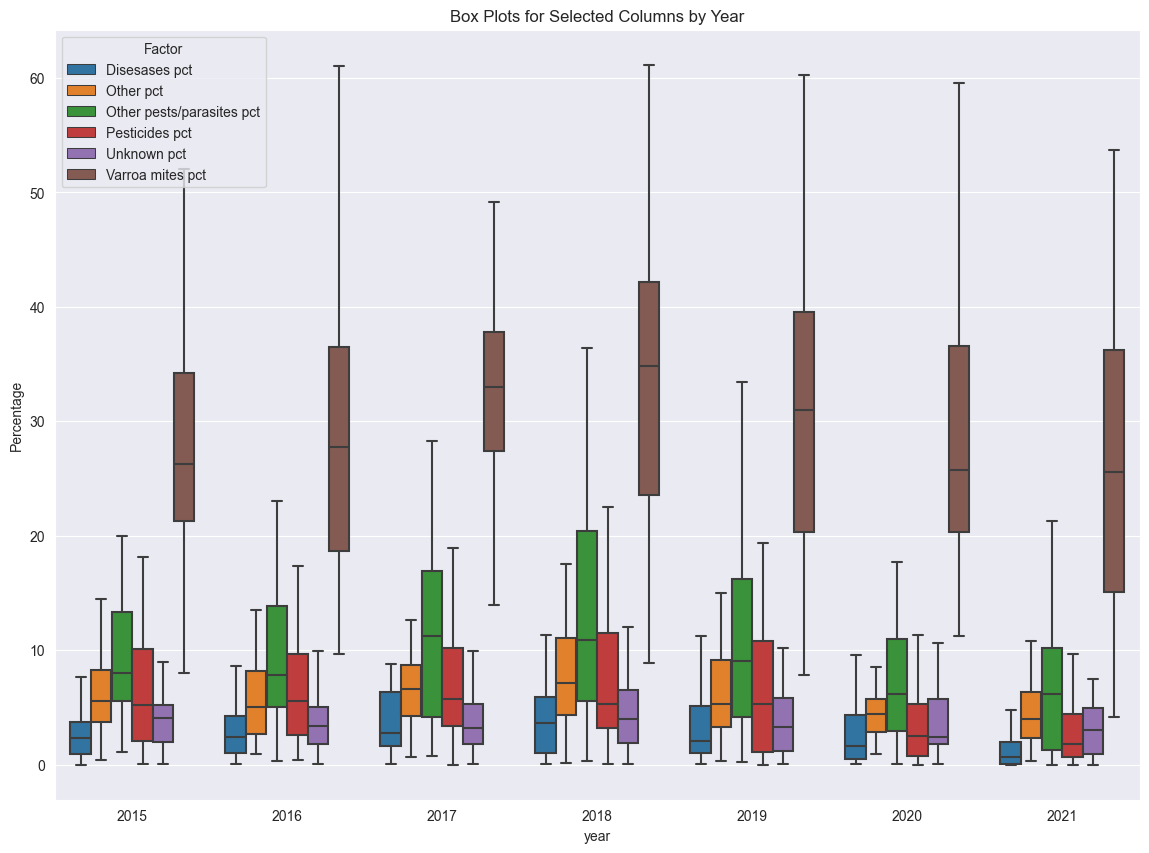

In [1862]:
perturbation_factor_by_year_no_us = perturbation_factor_by_year[perturbation_factor_by_year['state'] != 'United States']
df = pd.DataFrame(perturbation_factor_by_year_no_us)

# List of columns to create box plots for
columns_to_plot = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

# Reshape the DataFrame to "long" format
df_long = pd.melt(df, id_vars=['year'], value_vars=columns_to_plot, var_name='Factor', value_name='Value')

# Set the figure size for the combined box plots
plt.figure(figsize=(14, 10))

# Create a box plot for all data
sns.boxplot(data=df_long, x='year', y='Value', hue='Factor', showfliers=False)

plt.title('Box Plots for Selected Columns by Year')
plt.ylabel('Percentage')

# Show the combined box plots
plt.show()

In [1863]:
# Group by 'state,' 'month,'
perturbation_factor_by_month = perturbation_factor.groupby(['state', 'months']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'mean',
    'Disesases':'mean',
    'Other':'mean',
    'Other pests/parasites':'mean',
    'Pesticides':'mean',
    'Unknown':'mean',
    'Varroa mites':'mean',
}).reset_index()

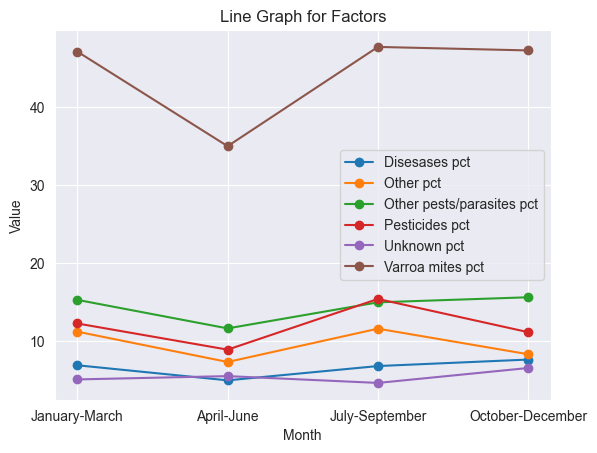

In [1864]:
perturbation_factor_by_month_us= perturbation_factor_by_month[perturbation_factor_by_month['state'] == 'United States']
perturbation_factor_by_month_no_us= perturbation_factor_by_month[perturbation_factor_by_month['state'] != 'United States']
factors = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

from itertools import cycle
# Choose a colormap (e.g., 'tab10' for a set of 10 distinct colors)
colormap = plt.cm.get_cmap('tab10')

# Create a line graph for each factor with automatic color assignment
color_cycle = cycle(colormap.colors)

#Create dataframe to store data
data = {}

# Add a 'year' column to the DataFrame
data['months'] = ['January-March', 'April-June', 'July-September', 'October-December']
for factor in factors:
    data[factor] = perturbation_factor_by_month_us[factor]
    color = next(color_cycle)
    plt.plot(data['months'], data[factor], label=factor, marker='o', linestyle='-', color=color)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Line Graph for Factors')
plt.legend()

# Show the graph
plt.show()

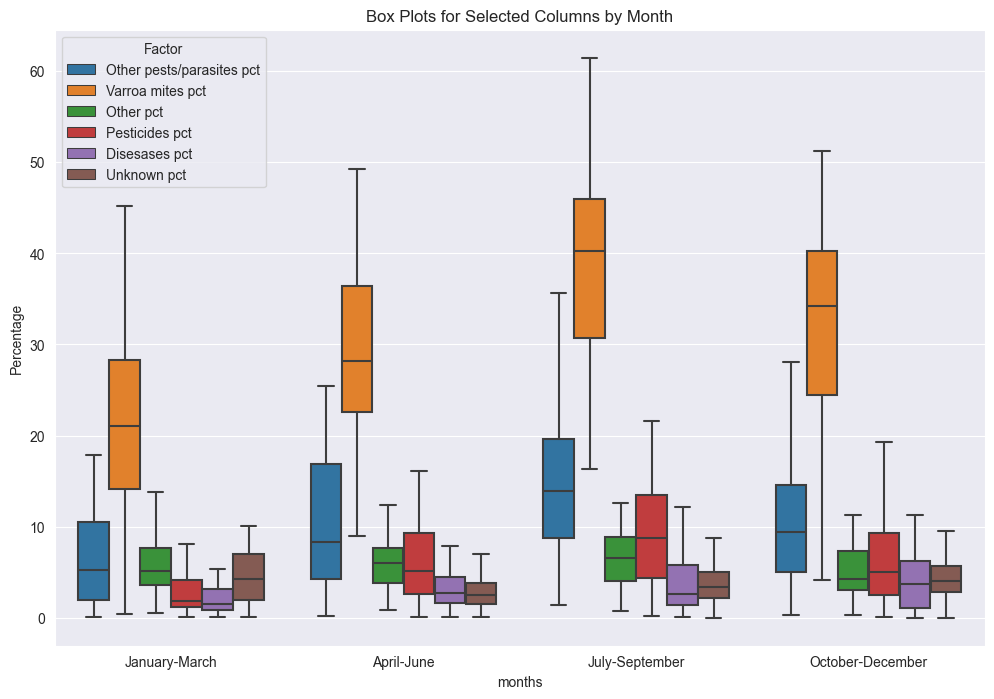

In [1865]:
df = pd.DataFrame(perturbation_factor_by_month_no_us)

# List of columns to create box plots for
columns_to_plot = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

# Reshape the DataFrame to "long" format
df_long = pd.melt(df, id_vars=['months'], value_vars=columns_to_plot, var_name='Factor', value_name='Value')

# Specify the custom order
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Use pd.Categorical to assign the custom order to the 'months' column
df_long['months'] = pd.Categorical(df_long['months'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'months' column
df_long = df_long.sort_values(by='months')

# Set the figure size for the combined box plots
plt.figure(figsize=(12, 8))

# Create a box plot for all data
sns.boxplot(data=df_long, x='months', y='Value', hue='Factor', showfliers=False)

plt.title('Box Plots for Selected Columns by Month')
plt.ylabel('Percentage')

# Show the combined box plots
plt.show()

In [1866]:
perturbation_factor_by_year_no_us

,state,year,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites
0,Alabama,2015,0.050000,4.325000,31.225000,1.825000,8.275,23.225000,4670.0,1.22,239.20,1490.14,97.00,463.85,1225.93
1,Alabama,2016,1.200000,4.275000,20.525000,4.000000,8.450,14.450000,4440.0,77.11,164.71,1014.65,213.75,428.05,716.11
2,Alabama,2017,2.250000,6.525000,14.175000,13.175000,6.200,31.250000,3930.0,90.32,245.69,533.13,488.73,276.30,1169.83
3,Alabama,2018,1.275000,7.825000,36.400000,11.025000,5.225,37.725000,4160.0,47.99,324.49,1804.14,488.94,231.76,1919.08
4,Alabama,2019,1.766667,7.266667,24.666667,1.800000,8.900,34.833333,2300.0,44.37,175.58,567.31,36.27,196.44,787.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Wyoming,2017,7.375000,5.425000,1.825000,3.225000,1.975,24.450000,13700.0,940.30,694.50,208.30,477.10,330.10,2952.00
325,Wyoming,2018,1.825000,2.325000,2.800000,4.525000,2.650,22.800000,9020.0,209.02,224.12,325.58,585.20,288.40,2809.88
326,Wyoming,2019,2.200000,3.700000,4.233333,0.733333,6.000,24.666667,6550.0,204.85,332.15,417.90,66.00,516.35,2283.55
327,Wyoming,2020,0.225000,2.075000,0.025000,2.350000,1.300,15.400000,6940.0,26.94,157.12,0.14,268.40,76.38,1250.68


In [1867]:
perturbation_factor_by_month_no_us

,state,months,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites
0,Alabama,April-June,0.600000,7.100000,25.466667,5.183333,8.733333,25.250000,1640.000000,15.268333,114.528333,443.525000,88.763333,202.885000,526.953333
1,Alabama,January-March,1.171429,5.071429,17.842857,4.171429,7.557143,24.357143,1168.571429,14.797143,65.634286,202.618571,51.348571,98.390000,275.668571
2,Alabama,July-September,0.600000,5.966667,42.966667,11.433333,10.050000,52.883333,1648.333333,6.768333,94.188333,698.556667,182.463333,176.726667,945.173333
3,Alabama,October-December,4.416667,4.316667,19.466667,3.416667,7.683333,25.966667,800.000000,45.618333,31.283333,170.165000,29.450000,67.655000,225.451667
4,Arizona,April-June,12.316667,15.466667,17.083333,8.416667,2.616667,28.383333,3316.666667,363.783333,577.350000,686.400000,332.083333,93.000000,796.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Wisconsin,October-December,10.316667,10.650000,19.283333,16.883333,16.083333,45.166667,7916.666667,851.916667,864.083333,1566.250000,1338.250000,1217.750000,3534.583333
184,Wyoming,April-June,2.683333,4.350000,4.133333,2.850000,2.183333,18.683333,2350.000000,39.800000,97.133333,118.250000,77.033333,52.316667,366.100000
185,Wyoming,January-March,0.100000,1.285714,0.142857,0.471429,2.071429,0.414286,1178.571429,1.212857,14.584286,0.388571,1.602857,21.438571,4.172857
186,Wyoming,July-September,3.733333,3.733333,3.150000,4.583333,2.216667,30.566667,4250.000000,152.750000,163.083333,116.866667,189.733333,96.733333,1307.916667


Merge with the data from the US Census Geography(https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html)

In [1868]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
# Load U.S. states shapefile (example using a built-in dataset)
gdf = gpd.read_file('us state/cb_2022_us_state_20m.shp')

#Load US region
region = pd.read_csv('us state/us census bureau regions and divisions.csv')

#Merge two dataset
gdf = gdf.merge(region, left_on=['NAME','STUSPS'], right_on=['State','State Code'])
gdf.drop(columns=['State','State Code'])

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Region,Division
0,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",South,West South Central
1,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",West,Pacific
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"POLYGON ((-89.54443 36.57451, -89.47935 36.566...",South,East South Central
3,13,01705317,0400000US13,13,GA,Georgia,00,149486268417,4418716153,"POLYGON ((-85.60516 34.98468, -85.47434 34.983...",South,South Atlantic
4,55,01779806,0400000US55,55,WI,Wisconsin,00,140292518676,29343193162,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...",Midwest,East North Central
5,41,01155107,0400000US41,41,OR,Oregon,00,248630319014,6169061220,"POLYGON ((-124.55244 42.84057, -124.48094 42.9...",West,Pacific
6,29,01779791,0400000US29,29,MO,Missouri,00,178052253239,2487526202,"POLYGON ((-95.76565 40.58521, -95.53318 40.582...",Midwest,West North Central
7,51,01779803,0400000US51,51,VA,Virginia,00,102258178227,8528072639,"MULTIPOLYGON (((-76.02348 37.28907, -75.98712 ...",South,South Atlantic
8,47,01325873,0400000US47,47,TN,Tennessee,00,106792368794,2322190840,"POLYGON ((-90.30070 35.02879, -90.26530 35.040...",South,East South Central
9,22,01629543,0400000US22,22,LA,Louisiana,00,111920896653,23730743631,"POLYGON ((-94.04305 32.69303, -94.04303 32.797...",South,West South Central


In [1869]:
region

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [1870]:
# Get unique values from the 'STATE_NAME' column in the GeoDataFrame
unique_state_names_gdf = set(gdf['NAME'].unique())

# Get unique values from the 'state' column in the merged DataFrame
unique_state_names_merged = set(perturbation_factor['state'].unique())

# Find the differences
in_gdf_not_merged = unique_state_names_gdf - unique_state_names_merged
in_merged_not_gdf = unique_state_names_merged - unique_state_names_gdf

# Display the differences
print("Unique values in 'STATE_NAME' but not in 'state':", in_gdf_not_merged)
print("Unique values in 'state' but not in 'STATE_NAME':", in_merged_not_gdf)

# Define the set of unique values in 'state' that don't match 'STATE_NAME'
unique_states_to_replace = {
    'United States Virgin Islands', 'Guam', 'Delaware', 'Nevada',
    'New Hampshire', 'District of Columbia', 'Commonwealth of the Northern Mariana Islands',
    'Alaska', 'Rhode Island', 'American Samoa', 'Puerto Rico'
}

# Replace the values in 'STATE_NAME' with 'Other States' for the unique values to include
gdf.loc[gdf['NAME'].isin(unique_states_to_replace), 'NAME'] = 'Other States'

Unique values in 'STATE_NAME' but not in 'state': {'District of Columbia', 'Alaska', 'Rhode Island', 'New Hampshire', 'Nevada', 'Delaware'}
Unique values in 'state' but not in 'STATE_NAME': {'United States', 'Other States'}


In [1871]:
top10_max_by_year = top10_max_by_year.melt(var_name='year', value_name='state')
top10_max_by_year = top10_max_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_lost_by_year = top10_lost_by_year.melt(var_name='year', value_name='state')
top10_lost_by_year = top10_lost_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_by_month = top10_by_month.melt(var_name='months', value_name='state')
top10_by_month = top10_by_month.merge(region, left_on=['state'], right_on=['State'])

In [1872]:
# top10_max_by_year[top10_max_by_year['year'] == '2015']
top10_max_by_year

,year,state,State,State Code,Region,Division
0,2015,California,California,CA,West,Pacific
1,2016,California,California,CA,West,Pacific
2,2017,California,California,CA,West,Pacific
3,2018,California,California,CA,West,Pacific
4,2019,California,California,CA,West,Pacific
...,...,...,...,...,...,...
65,2020,Georgia,Georgia,GA,South,South Atlantic
66,2021,Georgia,Georgia,GA,South,South Atlantic
67,2016,Oregon,Oregon,OR,West,Pacific
68,2019,Oregon,Oregon,OR,West,Pacific


In [1873]:
top10_max_by_year.groupby('year').Division.value_counts()

year  Division          
2015  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2016  Pacific               3
      West North Central    3
      Mountain              2
      South Atlantic        1
      West South Central    1
2017  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2018  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2019  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2020  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2021  West North Central    3
      Mountain              2
      Pacific  

In [1874]:
top10_max_by_year.groupby('year').Region.value_counts()

year  Region 
2015  West       4
      Midwest    3
      South      3
2016  West       5
      Midwest    3
      South      2
2017  West       4
      Midwest    3
      South      3
2018  West       4
      Midwest    3
      South      3
2019  West       4
      Midwest    3
      South      3
2020  West       4
      Midwest    3
      South      3
2021  West       4
      Midwest    3
      South      3
Name: Region, dtype: int64

In [1875]:
top10_lost_by_year

,year,state,State,State Code,Region,Division
0,2015,Kansas,Kansas,KS,Midwest,West North Central
1,2016,Kansas,Kansas,KS,Midwest,West North Central
2,2017,Kansas,Kansas,KS,Midwest,West North Central
3,2018,Kansas,Kansas,KS,Midwest,West North Central
4,2019,Kansas,Kansas,KS,Midwest,West North Central
...,...,...,...,...,...,...
64,2019,Iowa,Iowa,IA,Midwest,West North Central
65,2020,Michigan,Michigan,MI,Midwest,East North Central
66,2020,Idaho,Idaho,ID,West,Mountain
67,2020,Missouri,Missouri,MO,Midwest,West North Central


In [1876]:
top10_lost_by_year.groupby('year').Division.value_counts()

year  Division          
2015  East North Central    3
      East South Central    2
      South Atlantic        2
      Mountain              1
      West North Central    1
      West South Central    1
2016  Mountain              2
      West North Central    2
      East North Central    1
      East South Central    1
      Middle Atlantic       1
      South Atlantic        1
      West South Central    1
2017  East North Central    2
      Mountain              2
      East South Central    1
      Middle Atlantic       1
      New England           1
      South Atlantic        1
      West North Central    1
      West South Central    1
2018  East North Central    2
      East South Central    2
      Mountain              2
      New England           1
      South Atlantic        1
      West North Central    1
      West South Central    1
2019  East North Central    3
      South Atlantic        2
      West North Central    2
      East South Central    1
      Mountain 

In [1877]:
top10_lost_by_year.groupby('year').Region.value_counts()

year  Region   
2015  South        5
      Midwest      4
      West         1
2016  Midwest      3
      South        3
      West         2
      Northeast    1
2017  Midwest      3
      South        3
      Northeast    2
      West         2
2018  South        4
      Midwest      3
      West         2
      Northeast    1
2019  Midwest      5
      South        3
      Northeast    1
      West         1
2020  Midwest      5
      West         3
      South        2
2021  Midwest      5
      South        3
      Northeast    1
      West         1
Name: Region, dtype: int64

In [1878]:
top10_by_month

,months,state,State,State Code,Region,Division
0,January-March,Ohio,Ohio,OH,Midwest,East North Central
1,January-March,Illinois,Illinois,IL,Midwest,East North Central
2,April-June,Illinois,Illinois,IL,Midwest,East North Central
3,January-March,Kansas,Kansas,KS,Midwest,West North Central
4,July-September,Kansas,Kansas,KS,Midwest,West North Central
5,October-December,Kansas,Kansas,KS,Midwest,West North Central
6,January-March,Maryland,Maryland,MD,South,South Atlantic
7,January-March,Kentucky,Kentucky,KY,South,East South Central
8,April-June,Alabama,Alabama,AL,South,East South Central
9,April-June,Arizona,Arizona,AZ,West,Mountain


In [1879]:
top10_by_month.groupby('months').Division.value_counts()

months            Division          
April-June        East North Central    1
                  East South Central    1
                  Mountain              1
                  South Atlantic        1
                  West South Central    1
January-March     East North Central    2
                  East South Central    1
                  South Atlantic        1
                  West North Central    1
July-September    Mountain              3
                  West North Central    2
October-December  Mountain              3
                  South Atlantic        1
                  West North Central    1
Name: Division, dtype: int64

In [1880]:
top10_by_month.groupby('months').Region.value_counts()

months            Region 
April-June        South      3
                  Midwest    1
                  West       1
January-March     Midwest    3
                  South      2
July-September    West       3
                  Midwest    2
October-December  West       3
                  Midwest    1
                  South      1
Name: Region, dtype: int64

In [1881]:
abey_colonie_filter_by_year_no_us = abey_colonie_filter_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_year_no_us

,state,year,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,State,State Code,Region,Division
0,Alabama,2015,7750.000000,9000.0,4670.0,15.500000,4940.0,Alabama,AL,South,East South Central
1,Alabama,2016,7625.000000,8000.0,4440.0,14.750000,2890.0,Alabama,AL,South,East South Central
2,Alabama,2017,7000.000000,9500.0,3930.0,13.000000,3010.0,Alabama,AL,South,East South Central
3,Alabama,2018,7500.000000,8500.0,4160.0,13.500000,4310.0,Alabama,AL,South,East South Central
4,Alabama,2019,6166.666667,7000.0,2300.0,12.333333,1200.0,Alabama,AL,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...
310,Wyoming,2017,21125.000000,36000.0,13700.0,13.000000,11700.0,Wyoming,WY,West,Mountain
311,Wyoming,2018,19250.000000,34000.0,9020.0,8.000000,5190.0,Wyoming,WY,West,Mountain
312,Wyoming,2019,19166.666667,28000.0,6550.0,8.666667,5600.0,Wyoming,WY,West,Mountain
313,Wyoming,2020,19375.000000,34000.0,6940.0,6.250000,3550.0,Wyoming,WY,West,Mountain


In [1882]:
abey_colonie_filter_by_year_group_by_region = abey_colonie_filter_by_year_no_us.groupby(['Region']).agg({
    'colony_n': 'mean',
    'colony_max': 'mean',  # Take the maximum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
}).reset_index()
abey_colonie_filter_by_year_group_by_region

,Region,colony_n,colony_max,colony_lost,colony_lost_pct
0,Midwest,52445.238095,97041.666667,25526.547619,11.719902
1,Northeast,13131.122449,20651.020408,5271.632653,8.984563
2,South,52246.111111,72138.095238,23871.809524,12.215092
3,West,126549.891775,207279.220779,62163.376623,10.695251


In [1883]:
abey_colonie_filter_by_month_no_us = abey_colonie_filter_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_month_no_us

,state,months,colony_max,colony_lost,colony_lost_pct,colony_added,State,State Code,Region,Division
0,Alabama,April-June,8083.333333,1640.000000,19.500000,2183.333333,Alabama,AL,South,East South Central
1,Alabama,January-March,7500.000000,1168.571429,16.000000,1177.142857,Alabama,AL,South,East South Central
2,Alabama,July-September,10166.666667,1648.333333,15.500000,808.333333,Alabama,AL,South,East South Central
3,Alabama,October-December,8666.666667,800.000000,10.000000,313.333333,Alabama,AL,South,East South Central
4,Arizona,April-June,24916.666667,3316.666667,13.166667,13416.666667,Arizona,AZ,West,Mountain
...,...,...,...,...,...,...,...,...,...,...
175,Wisconsin,October-December,52666.666667,7916.666667,15.166667,1158.333333,Wisconsin,WI,Midwest,East North Central
176,Wyoming,April-June,26333.333333,2350.000000,9.166667,5450.000000,Wyoming,WY,West,Mountain
177,Wyoming,January-March,11857.142857,1178.571429,9.142857,1374.285714,Wyoming,WY,West,Mountain
178,Wyoming,July-September,34333.333333,4250.000000,12.166667,1685.000000,Wyoming,WY,West,Mountain


<Figure size 640x480 with 0 Axes>

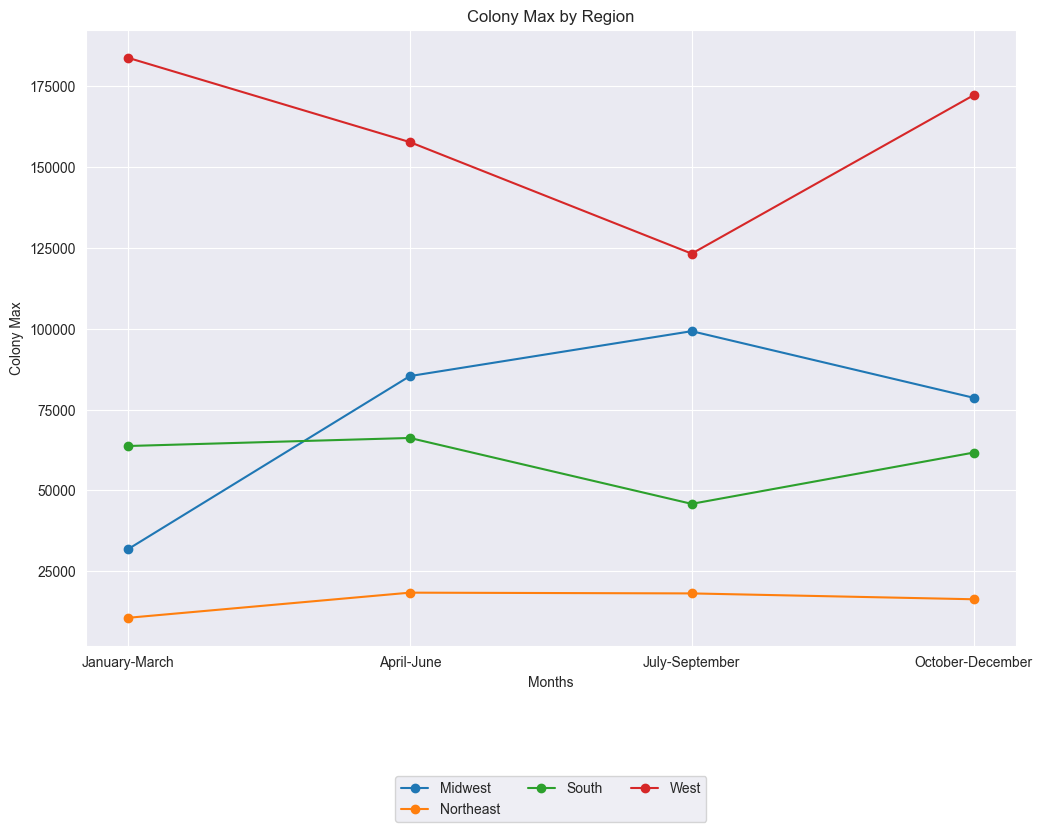

In [1884]:
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_no_us.groupby(['Region','months']).agg({
    'colony_max': 'mean',  # Take the maximum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
    'colony_added': 'mean'
}).reset_index()
# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month_group_by_region['months'] = pd.Categorical(abey_colonie_filter_by_month_group_by_region['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_group_by_region.sort_values(['months'])
abey_colonie_filter_by_month_group_by_region

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Region.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Region'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_max'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

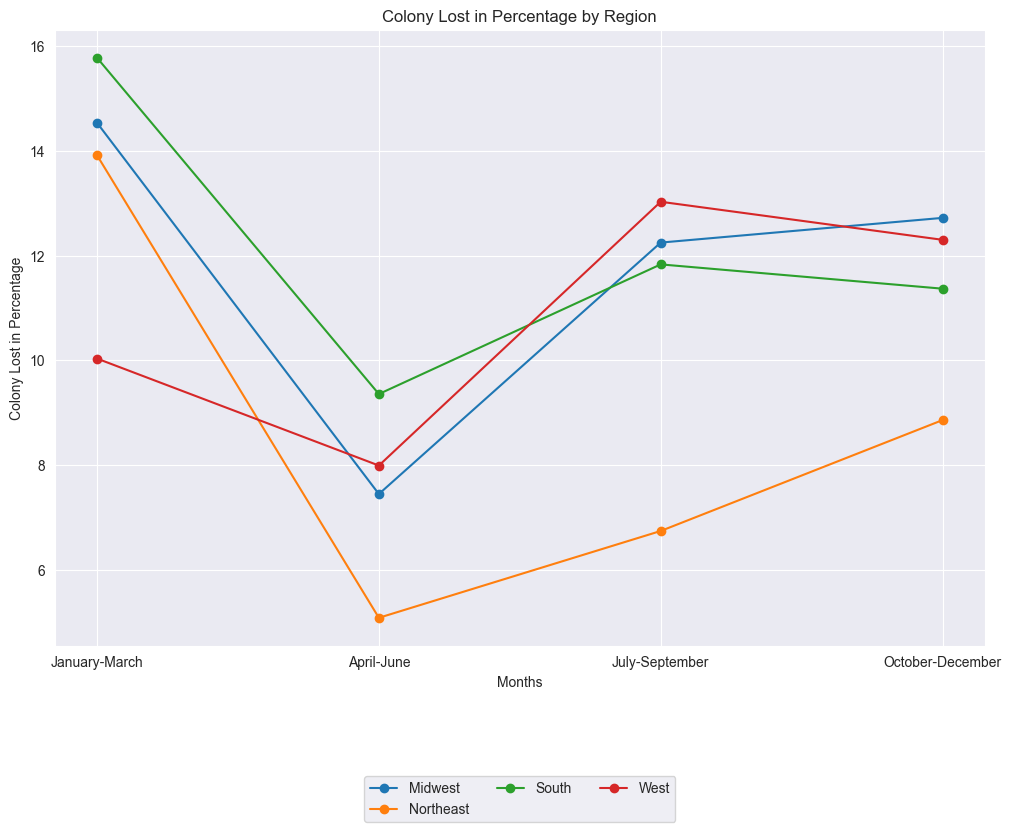

In [1887]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Region.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Region'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_lost_pct'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost in Percentage')
ax.set_title('Colony Lost in Percentage by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

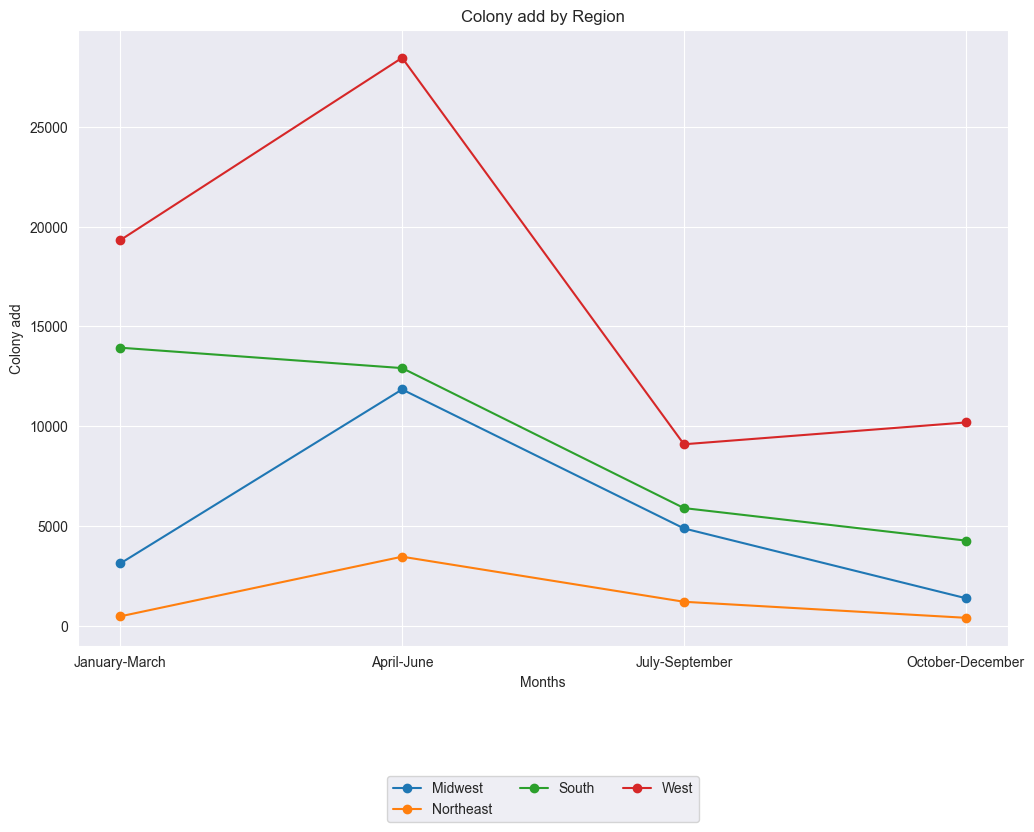

In [1886]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Region.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Region'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_added'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony add')
ax.set_title('Colony add by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
perturbation_factor_by_year_no_us = perturbation_factor_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])
perturbation_factor_by_year_no_us

In [ ]:
perturbation_factor_by_month_no_us = perturbation_factor_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
perturbation_factor_by_month_no_us

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Set the projection to 'Lambert Conformal Conic' and limit the plot to the specified region
gdf = gdf.to_crs("EPSG:3338")
xmin, xmax, ymin, ymax = -125, -65, 24, 50  # Adjust the values as needed

# Choose a vibrant colormap, e.g., 'viridis', 'plasma', 'magma', 'inferno', or 'cividis'
cmap = 'viridis'

#Change type of 'state' value
abey_colonie_filter_by_year['state'] = abey_colonie_filter_by_year['state'].astype("string")
gdf['NAME'] = gdf['NAME'].astype("string")
for year in abey_colonie_filter_by_year['year'].unique():
     # Filter the DataFrame for the current year
    year_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year]

    # Create a new GeoDataFrame with the bee colony loss data for the current year
    gdf_year = gdf.merge(year_data, left_on='NAME', right_on='state')
    # gdf_year['STATE_NAME'] = gdf_year['STATE_NAME'].astype(str)
    # # Set the figure size to control the map size
    # plt.figure(figsize=(10, 6))
    #
    # # Create the choropleth map
    # ax = gdf_year.plot(column='colony_lost', cmap='YlGnBu', legend=True, legend_kwds={'label': "Colony Loss"})
    #
    # # Set the bounds to zoom in on the specified region
    # ax.set_xlim(xmin, xmax)
    # ax.set_ylim(ymin, ymax)
    #
    # # Set the legend properties, including position and size
    # ax.legend(title="Colony Loss", loc='upper left', bbox_to_anchor=(1.05, 1))
    #
    # # Set plot title
    # ax.set_title(f"Bee Colony Loss by State - Year {year}")
    #
    # # Show the map
    # plt.show()
    # Create an interactive choropleth map using Plotly Express
    fig = px.choropleth(
        gdf_year,
        geojson='geometry',
        locations='NAME',
        color='colony_lost',
        color_continuous_scale='YlGnBu',
        hover_name='NAME',
        title=f"Bee Colony Loss by State - Year {year}",
        scope='usa',
        range_color=(0, 200000)
    )

    #
    # # Customize the map layout if needed
    # fig.update_geos(projection_type="conic conformal", showcoastlines=True)

    # Show the interactive map
    fig.show()


In [ ]:
gdf_year.info()

In [ ]:
region = pd.read_csv('us state/us census bureau regions and divisions.csv')
region

In [ ]:
gdf